# Task 1: Data Integration and Database Generation

Checking the contents of the csv files provided.

Using the methods provided in the tutorials.

In [1]:
import csv
import pprint
import psycopg2
import psycopg2.extras

files = ['StatisticalAreas.csv', 'Neighbourhoods.csv','BusinessStats.csv','CensusStats.csv','BikeSharingPods.csv']

for f in files:
    print(f)
    data = list(csv.DictReader(open(f)))
    pprint.pprint(data[0])

StatisticalAreas.csv
OrderedDict([('area_id', '1'),
             ('area_name', 'New South Wales'),
             ('parent_area_id', '0')])
Neighbourhoods.csv
OrderedDict([('area_id', '102011028'),
             ('area_name', 'Avoca Beach - Copacabana'),
             ('land_area', '643.8'),
             ('population', '7590'),
             ('number_of_dwellings', '2325'),
             ('number_of_businesses', '738')])
BusinessStats.csv
OrderedDict([('area_id', '102011028'),
             ('num_businesses', '738'),
             ('retail_trade', '35'),
             ('accommodation_and_food_services', '33'),
             ('health_care_and_social_assistance', '62'),
             ('education_and_training', '9'),
             ('arts_and_recreation_services', '20')])
CensusStats.csv
OrderedDict([('area_id', '102011028'),
             ('median_annual_household_income', '46996'),
             ('avg_monthly_rent', '1906')])
BikeSharingPods.csv
OrderedDict([('station_id', '503'),
             ('name'

In [2]:
import subprocess
subprocess.call("conda install -c anaconda psycopg2", shell=True)

import csv
import pprint
import psycopg2
import psycopg2.extras

# to connect to USYD servers to run code

def pgconnect():
    # please replace <your_unikey> and <your_SID> with your own details
    YOUR_UNIKEY = 'bcra4120'
    YOUR_PW     = '310322316'
    try:
        conn = psycopg2.connect(host='soit-db-pro-1.ucc.usyd.edu.au',
                                database='y19s1d2x01_'+YOUR_UNIKEY,
                                user='y19s1d2x01_'+YOUR_UNIKEY,
                                password=YOUR_PW)
        # PostGIS server

        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
    return conn

conn = pgconnect()

connected


In [3]:
# for executing SQL queries through python

def pgexec( conn, sqlcmd, args, msg, silent=False ):
   """ utility function to execute some SQL statement
       can take optional arguments to fill in (dictionary)
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval


# for querying tables

def pgquery( conn, sqlcmd, args=None, msg=False, returntype='tuple'):
    """ utility function to execute some SQL query statement
        it can take optional arguments (as a dictionary) to fill in for placeholders in the SQL
        will return the complete query result as return value - or in case of error: None
        error and transaction handling built-in (by using the 'with' clauses)"""
    retval = None
    with conn:
        cursortype = None if returntype != 'dict' else psycopg2.extras.RealDictCursor
        with conn.cursor(cursor_factory=cursortype) as cur:
            try:
                if args is None:
                    cur.execute(sqlcmd)
                else:
                    cur.execute(sqlcmd, args)
                if (cur.description != None ):
                    retval = cur.fetchall() # we use fetchall() as we expect only _small_ query results
                if msg != False:
                    print("success: " + msg)
            except psycopg2.DatabaseError as e:
                if e.pgcode != None and msg:
                    print("db read error: "+msg)
                    print(e)
            except Exception as e:
                print(e)
    return retval


#for data cleaning

import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {"":None}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

        
# login to database

conn = pgconnect()

connected


# Loading Data and Creating the Database

### Statistical Areas:
(no cleaning required)

In [4]:
data = list(csv.DictReader(open('StatisticalAreas.csv')))
    
# to reset the table
pgexec (conn, "DROP TABLE IF EXISTS StatisticalAreas", None, "Reset Table StatisticalAreas")

# set the schema
StatisticalAreas_schema = """CREATE TABLE IF NOT EXISTS StatisticalAreas (
                         area_id         INTEGER PRIMARY KEY,
                         area_name       VARCHAR,
                         parent_area_id  INTEGER
                   )"""
pgexec (conn, StatisticalAreas_schema, None, "Create Table StatisticalAreas")

# load data
insert_stmt = """INSERT INTO StatisticalAreas(area_id, area_name, parent_area_id) 
VALUES (%(area_id)s, %(area_name)s, %(parent_area_id)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")


success: Reset Table StatisticalAreas
success: Create Table StatisticalAreas
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted

In [5]:
# to check content of StatisticalAreas table if needed
# for example, to view the table StatisticalAreas:

query_stmt = "SELECT * FROM StatisticalAreas"
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT * FROM StatisticalAreas


[(1, 'New South Wales', 0),
 (10, 'Greater Sydney', 1),
 (11, 'Rest of NSW', 1),
 (2, 'Victoria', 0),
 (20, 'Greater Melbourne', 2),
 (21, 'Rest of Victoria', 2),
 (3, 'Queensland', 0),
 (30, 'Greater Brisbane', 3),
 (31, 'Rest of Qld', 3),
 (4, 'South Australia', 0),
 (40, 'Greater Adelaide', 4),
 (41, 'Rest of SA', 4),
 (5, 'Western Australia', 0),
 (50, 'Greater Perth', 5),
 (51, 'Rest of WA', 5),
 (6, 'Tasmania', 0),
 (60, 'Greater Hobart', 6),
 (61, 'Rest of Tasmania', 6),
 (7, 'Northern Territory', 0),
 (70, 'Greater Darwin', 7),
 (71, 'Rest of NT', 7),
 (8, 'Australian Capital Territory', 0),
 (80, 'Australian Capital Territory', 8),
 (9, 'Other Territories', 0),
 (90, 'Other Territories', 9),
 (102, 'Central Coast', 10),
 (10201, 'Gosford', 102),
 (102011028, 'Avoca Beach - Copacabana', 10201),
 (102011029, 'Box Head - MacMasters Beach', 10201),
 (102011030, 'Calga - Kulnura', 10201),
 (102011031, 'Erina - Green Point', 10201),
 (102011032, 'Gosford - Springfield', 10201),
 (10

### Neighbourhoods:

In [6]:
# to reset the table
pgexec (conn, "DROP TABLE IF EXISTS Neighbourhoods", None, "Reset Table Neighbourhoods")

data = list(csv.DictReader(open('Neighbourhoods.csv')))

clean(data, 'population', int, DEFAULT_VALUE)
clean(data, 'number_of_businesses', int, DEFAULT_VALUE)

# set the schema
Neighbourhoods_schema = """CREATE TABLE IF NOT EXISTS Neighbourhoods (
                         area_id              INTEGER PRIMARY KEY,
                         area_name            VARCHAR,
                         land_area            FLOAT,
                         population           INTEGER,
                         number_of_dwellings  INTEGER,
                         number_of_businesses INTEGER
                   )"""
pgexec (conn, Neighbourhoods_schema, None, "Create Table Neighbourhoods")

# load data
insert_stmt = """INSERT INTO Neighbourhoods(area_id, area_name, land_area, population, number_of_dwellings, number_of_businesses) 
VALUES (%(area_id)s, %(area_name)s, %(land_area)s, %(population)s, %(number_of_dwellings)s, %(number_of_businesses)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table Neighbourhoods
success: Create Table Neighbourhoods
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
suc

In [7]:
# to check content of Neighbourhoods table if needed
# for example, to view the table Neighbourhoods:

query_stmt = "SELECT * FROM Neighbourhoods"
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT * FROM Neighbourhoods


[(102011028, 'Avoca Beach - Copacabana', 643.8, 7590, 2325, 738),
 (102011029, 'Box Head - MacMasters Beach', 3208.6, 10986, 3847, 907),
 (102011030, 'Calga - Kulnura', 76795.1, 4841, 1575, 1102),
 (102011031, 'Erina - Green Point', 3379.3, 14237, 4450, 1666),
 (102011032, 'Gosford - Springfield', 1691.2, 19385, 6373, 2126),
 (102011033, 'Kariong', 830.6, 6540, 1824, 352),
 (102011034, 'Kincumber - Picketts Valley', 1208.9, 7428, 1946, 479),
 (102011035, 'Narara', 770.2, 6853, 2006, 292),
 (102011036, 'Niagara Park - Lisarow', 1673.2, 8173, 2345, 477),
 (102011037, 'Point Clare - Koolewong', 678.7, 6281, 2220, 312),
 (102011038, 'Saratoga - Davistown', 476.8, 7177, 2366, 486),
 (102011039, 'Terrigal - North Avoca', 1010.7, 14048, 4457, 1351),
 (102011040, 'Umina - Booker Bay - Patonga', 2522.8, 24251, 7540, 1217),
 (102011041, 'Wamberal - Forresters Beach', 1372.2, 10308, 2947, 924),
 (102011042, 'Woy Woy - Blackwall', 1742.3, 14327, 4304, 691),
 (102011043, 'Wyoming', 838.1, 11659, 32

### BusinessStats:

In [8]:
# to reset the table
pgexec (conn, "DROP TABLE IF EXISTS BusinessStats", None, "Reset Table BusinessStats")

data = list(csv.DictReader(open('BusinessStats.csv')))

clean(data, 'num_businesses', int, DEFAULT_VALUE)
clean(data, 'retail_trade', int, DEFAULT_VALUE)
clean(data, 'accommodation_and_food_services', int, DEFAULT_VALUE)
clean(data, 'education_and_training', int, DEFAULT_VALUE)
clean(data, 'arts_and_recreation_services', int, DEFAULT_VALUE)

# set the schema
BusinessStats_schema = """CREATE TABLE IF NOT EXISTS BusinessStats (
                         area_id                           INTEGER PRIMARY KEY,
                         num_businesses                    INTEGER,
                         retail_trade                      INTEGER,
                         accommodation_and_food_services   INTEGER,
                         health_care_and_social_assistance INTEGER,
                         education_and_training            INTEGER,
                         arts_and_recreation_services      INTEGER
                   )"""
pgexec (conn, BusinessStats_schema, None, "Create Table BusinessStats")

# load data
insert_stmt = """INSERT INTO BusinessStats(area_id, num_businesses, retail_trade, accommodation_and_food_services, education_and_training, arts_and_recreation_services) 
VALUES (%(area_id)s, %(num_businesses)s, %(retail_trade)s, %(accommodation_and_food_services)s, %(education_and_training)s, %(arts_and_recreation_services)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table BusinessStats
success: Create Table BusinessStats
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
succe

In [9]:
# to check content of BusinessStats table if needed
# for example, to view the table BusinessStats:

query_stmt = "SELECT * FROM BusinessStats "
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT * FROM BusinessStats 


[(102011028, 738, 35, 33, None, 9, 20),
 (102011029, 907, 42, 21, None, 11, 29),
 (102011030, 1102, 42, 17, None, 18, 23),
 (102011031, 1666, 143, 68, None, 22, 15),
 (102011032, 2126, 159, 95, None, 36, 27),
 (102011033, 352, 18, 14, None, 5, 8),
 (102011034, 479, 31, 21, None, 14, 11),
 (102011035, 292, 14, 5, None, 8, 8),
 (102011036, 477, 22, 17, None, 10, 3),
 (102011037, 312, 10, 9, None, 5, 7),
 (102011038, 486, 32, 14, None, 4, 12),
 (102011039, 1351, 66, 70, None, 25, 21),
 (102011040, 1217, 73, 76, None, 22, 23),
 (102011041, 924, 36, 31, None, 12, 16),
 (102011042, 691, 53, 51, None, 10, 10),
 (102011043, 486, 23, 30, None, 12, 11),
 (102021044, 1035, 50, 32, None, 15, 15),
 (102021045, 290, 17, 9, None, None, 4),
 (102021046, 350, 16, 17, None, 4, 3),
 (102021047, 994, 55, 24, None, 17, 8),
 (102021048, 816, 65, 34, None, 16, 12),
 (102021049, 390, 16, 6, None, 4, 4),
 (102021050, 424, 26, 20, None, 6, 3),
 (102021051, 439, 31, 10, None, 6, 11),
 (102021052, 287, 14, 11, No

### CensusStats:

In [10]:
# to reset the table
pgexec (conn, "DROP TABLE IF EXISTS CensusStats", None, "Reset Table CensusStats")

data = list(csv.DictReader(open('CensusStats.csv')))

clean(data, 'median_annual_household_income', int, DEFAULT_VALUE)
clean(data, 'avg_monthly_rent', int, DEFAULT_VALUE)

# set the schema
CensusStats_schema = """CREATE TABLE IF NOT EXISTS CensusStats (
                         area_id                         INTEGER PRIMARY KEY,
                         median_annual_household_income  INTEGER,
                         avg_monthly_rent                INTEGER
                   )"""
pgexec (conn, CensusStats_schema, None, "Create Table CensusStats")

# load data
insert_stmt = """INSERT INTO CensusStats(area_id, median_annual_household_income, avg_monthly_rent) 
VALUES (%(area_id)s, %(median_annual_household_income)s, %(avg_monthly_rent)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table CensusStats
success: Create Table CensusStats
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: 

In [11]:
# to check content of CensusStats table if needed
# for example, to view the table CensusStats:

query_stmt = "SELECT * FROM CensusStats"
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT * FROM CensusStats


[(102011028, 46996, 1906),
 (102011029, 42621, 1682),
 (102011030, 42105, 1182),
 (102011031, 43481, 1595),
 (102011032, 45972, 1382),
 (102011033, 47896, 1649),
 (102011034, 41642, 1397),
 (102011035, 46660, 1512),
 (102011036, 45762, 1495),
 (102011037, 45966, 1572),
 (102011038, 43171, 1667),
 (102011039, 46422, 2022),
 (102011040, 40252, 1517),
 (102011041, 47295, 1902),
 (102011042, 42481, 1387),
 (102011043, 43438, 1466),
 (102021044, 42469, 1423),
 (102021045, 42641, 1526),
 (102021046, 41702, 1347),
 (102021047, 45015, 1593),
 (102021048, 41051, 1330),
 (102021049, 44122, 1364),
 (102021050, 41152, 1363),
 (102021051, 48214, 1469),
 (102021052, 42683, 1455),
 (102021053, 44137, 1404),
 (102021054, 39615, 1296),
 (102021055, 44360, 1699),
 (102021056, 47983, 1823),
 (102021057, 41055, 1276),
 (115011290, 52019, 2166),
 (115011291, 53703, 2521),
 (115011294, 50112, 2661),
 (115011296, 53907, 2605),
 (115011553, 50992, 2360),
 (115011554, 48100, 2088),
 (115011555, 52307, 2519),
 

### BikesharingPods:
(no cleaning required)

In [12]:
# to reset the table
pgexec (conn, "DROP TABLE IF EXISTS BikeSharingPods", None, "Reset Table BikeSharingPods")

data = list(csv.DictReader(open('BikeSharingPods.csv')))

# set the schema
BikeSharingPods_schema = """CREATE TABLE IF NOT EXISTS BikeSharingPods (
                         station_id     INTEGER PRIMARY KEY,
                         name           VARCHAR,
                         num_bikes      INTEGER,
                         num_scooters   INTEGER,
                         latitude       FLOAT,
                         longitude      FLOAT,
                         description    VARCHAR
                   )"""
pgexec (conn, BikeSharingPods_schema, None, "Create Table BikeSharingPods")

# load data
insert_stmt = """INSERT INTO BikeSharingPods(station_id, name, num_bikes, num_scooters, latitude, longitude, description) 
VALUES (%(station_id)s, %(name)s, %(num_bikes)s, %(num_scooters)s, %(latitude)s, %(longitude)s, %(description)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table BikeSharingPods
success: Create Table BikeSharingPods
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
s

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

In [13]:
# to check content of BikeSharingPods table if needed
# for example, to view the table BikeSharingPods:

query_stmt = "SELECT * FROM BikeSharingPods"
print(query_stmt)
result = pgquery (conn, query_stmt, returntype='dict')
pprint.pprint(result)

SELECT * FROM BikeSharingPods
[{'description': 'in a dedicated bay on Waiwera Street near the corner of '
                 'Lavender Street. This dedicated station has been provided by '
                 'North Sydney City Council for the benefit of local residents '
                 'and businesses.',
  'latitude': -33.843322,
  'longitude': 151.205973,
  'name': 'Lavender Bay - Waiwera Street',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 503},
 {'description': 'On London Street near the corner of Augustus Street.',
  'latitude': -33.896722,
  'longitude': 151.171199,
  'name': 'Enmore - London Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 491},
 {'description': 'in a dedicated bay on Bourke Sreet, just south of Cleveland '
                 'Street. Thanks to City of Sydney for this great location.',
  'latitude': -33.891971,
  'longitude': 151.214386,
  'name': 'Redfern - Bourke Street near Cleveland Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'st

  'station_id': 26},
 {'description': 'On Marian Street near the corner of Cross Lane.',
  'latitude': -33.900611,
  'longitude': 151.173356,
  'name': 'Enmore - Marian Street',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 490},
 {'description': 'in a dedicated bay on Glebe Glebe Point Road next to Toxteth '
                 'Road.',
  'latitude': -33.875878,
  'longitude': 151.183897,
  'name': 'Glebe - Glebe Point Road',
  'num_bikes': 11,
  'num_scooters': 7,
  'station_id': 91},
 {'description': 'in Osborne Road.',
  'latitude': -33.802475,
  'longitude': 151.287146,
  'name': 'Manly - Osborne Road',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 244},
 {'description': 'TBA',
  'latitude': -33.83684,
  'longitude': 151.20729,
  'name': 'North Sydney - Miller Street Car Park',
  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 115},
 {'description': 'on the corner of Wilson and Randle Streets at the bottom of '
                 'Hollis Park.',
  'latitude': -

  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 373},
 {'description': 'located corner of Grosvenor & Grafton Street in car park '
                 'under the Syd Enfield Drive. This pod is opposite the Bondi '
                 'Junction bus and train interchange',
  'latitude': -33.8908,
  'longitude': 151.2499,
  'name': 'Bondi Junction - Grosvenor Street',
  'num_bikes': 15,
  'num_scooters': 7,
  'station_id': 19},
 {'description': 'in a dedicated bay on Crown Street, on the corner of Jesson '
                 'St. Thanks to City of Sydney for this great location.',
  'latitude': -33.887935,
  'longitude': 151.213422,
  'name': 'Surry Hills - Crown Street near Jesson Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 281},
 {'description': 'in a dedicated bay on Queen street on the corner of King '
                 'Street. Thanks to City of Sydney for this great location!',
  'latitude': -33.89267,
  'longitude': 151.187064,
  'name': 'Newtown - Queen Street'

  'name': 'Redfern - Bourke Street near Cleveland Street',
  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 376},
 {'description': 'in a dedicated bay on Kippax Street, on the corner of '
                 'Waterloo Street',
  'latitude': -33.885311,
  'longitude': 151.210976,
  'name': 'Surry Hills - Kippax Street corner Waterloo Street',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 393},
 {'description': 'in a dedicated bay on Ithaca Road on the corner of '
                 'Esplanade. Thanks to City of Sydney for this great location!',
  'latitude': -33.870734,
  'longitude': 151.228553,
  'name': 'Elizabeth Bay - Ithaca Road corner Esplanade',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 474},
 {'description': 'on Roberts street on the corner of Francis Street. Thanks to '
                 'Willoughby Council for this great location!',
  'latitude': -33.808669,
  'longitude': 151.182172,
  'name': 'Artarmon - Roberts Street',
  'num_bikes': 11,
  'num_sco

  'num_scooters': 4,
  'station_id': 235},
 {'description': 'on Brown street, near the intersection with King Street. '
                 'these bikes and scooters is located in its very own '
                 'dedicated bay, generously provided by the City of Sydney.',
  'latitude': -33.894972,
  'longitude': 151.182282,
  'name': 'Newtown - Brown Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 172},
 {'description': 'on Palmer Street near the corner of Burton Street.',
  'latitude': -33.878635,
  'longitude': 151.216308,
  'name': 'Darlinghurst - Palmer Street',
  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 511},
 {'description': 'in a dedicated pod - generously provided by the City of '
                 'Sydney - near 156 Devonshire street, near Waterloo Street',
  'latitude': -33.8871,
  'longitude': 151.2102,
  'name': 'Surry Hills - Devonshire Street',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 125},
 {'description': 'in car park at Cafe Chur

  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 50},
 {'description': 'in a dedicated bay on Curlewis St, outside the bikes and '
                 'scooterswash at 57-59 Curlewis St. Thanks to Waverley '
                 'Council for this great location ',
  'latitude': -33.886544,
  'longitude': 151.270527,
  'name': 'Bondi - Curlewis Street outside the bikes and scooterswash',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 268},
 {'description': 'on the corner of Foveaux and Little Riley Streets. Thanks to '
                 'City of Sydney for this great location.',
  'latitude': -33.884868,
  'longitude': 151.212307,
  'name': 'Surry Hills - Foveaux Street corner Little Riley Street',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 411},
 {'description': 'in a dedicated bay on Botany Street on the corner of '
                 'Waverley Street. Thanks to Waverley Council for this great '
                 'location!',
  'latitude': -33.892939,
  'longitude': 15

  'longitude': 151.214012,
  'name': 'Surry Hills - Crown Street',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 208},
 {'description': 'on McMillan Road near the corner of Hampden Lane.',
  'latitude': -33.810583,
  'longitude': 151.186064,
  'name': 'Artarmon - McMillan Road',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 512},
 {'description': 'in front of 124 Kent Street in a dedicated bicycle bay '
                 'generously provided by the City of Sydney',
  'latitude': -33.861201,
  'longitude': 151.203742,
  'name': 'Millers Point - 124 Kent Street',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 317},
 {'description': 'Outside 116 Burton street, near the corner of Darlinghurst '
                 'Road, close to the Sydney Jewish Museum. Thanks to City of '
                 'Sydney for this great pod.',
  'latitude': -33.879018,
  'longitude': 151.219797,
  'name': 'Darlinghurst - Burton Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id'

  'station_id': 285},
 {'description': 'on Alice Street outside the Matt Hogan Reserve near the bus '
                 'stop.',
  'latitude': -33.903522,
  'longitude': 151.177563,
  'name': 'Newtown South - Alice Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 420},
 {'description': 'in a dedicated bay on Waruda Street on the corner of '
                 'Kirribilli Avenue. This dedicated space has been provided by '
                 'North Sydney City Council for the benefit of local residents '
                 'and businesses.',
  'latitude': -33.850316,
  'longitude': 151.216604,
  'name': 'Kirribilli - Waruda Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 432},
 {'description': 'in a dedicated bay on Bay Street, near the corner of Kelly '
                 'St. Thanks to City of Sydney for this great location.',
  'latitude': -33.88196,
  'longitude': 151.194717,
  'name': 'Ultimo - Bay Street near Kelly Street',
  'num_bikes': 11,
  'num_scooter

  'latitude': -33.872808,
  'longitude': 151.227939,
  'name': 'Elizabeth Bay - Roslyn Gardens near Evans Road',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 472},
 {'description': 'in a dedicated bay in the dead end of Cox Avenue. Thanks to '
                 'Waverley Council for this great location!',
  'latitude': -33.889248,
  'longitude': 151.270478,
  'name': 'Bondi - Cox Avenue',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 426},
 {'description': 'in a dedicated bay outside 78-84 Kippax St, just east of '
                 'Holt st. Thanks to City of Sydney for this great location',
  'latitude': -33.884594,
  'longitude': 151.209308,
  'name': 'Surry Hills - Kippax Street',
  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 207},
 {'description': 'in a dedicated location on McLaren street, on the north side '
                 'of the street on the corner of Miller Street. This space has '
                 'been provided by North Sydney City Council for

  'latitude': -33.909271,
  'longitude': 151.254621,
  'name': 'Clovelly - Fern Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 448},
 {'description': 'in a dedicated bay on Marriot St, adjacent to the shopping '
                 'centre, near the corner of Cleveland Street. Thanks to City '
                 'of Sydney for this great location!',
  'latitude': -33.891383,
  'longitude': 151.211663,
  'name': 'Redfern - Marriot Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 274},
 {'description': 'in a dedicated bay on Bay Road, between Whatmore Lane and '
                 'Crows Nest Road, near the station. This dedicated space has '
                 'been provided by North Sydney City Council for the benefit '
                 'of local residents and businesses.',
  'latitude': -33.837396,
  'longitude': 151.197691,
  'name': 'Waverton - Bay Road',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 305},
 {'description': 'on Botany Street near Art

                 'near the rear of the Law Building next to the motorcycle '
                 'bay. To access this location from outside the Uni, use Gate '
                 '2.  Thanks to UNSW for this great location!',
  'latitude': -33.916658,
  'longitude': 151.228525,
  'name': 'UNSW - Chemical Science Building',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 518},
 {'description': 'on Chandos Street near the corner of Loftus Street.',
  'latitude': -33.882784,
  'longitude': 151.131749,
  'name': 'Ashfield - Chandos Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 508},
 {'description': 'on street on Ashburner Street in between Darley and the '
                 'Esplanade East.',
  'latitude': -33.8015,
  'longitude': 151.2873,
  'name': 'Manly - Ashburner Street',
  'num_bikes': 9,
  'num_scooters': 5,
  'station_id': 45},
 {'description': 'on Wiley St near the corner of Victoria St in the angle '
                 'parking bays. these bikes and scooters 

  'longitude': 151.2259,
  'name': 'Kings Cross - Baroda Street',
  'num_bikes': 11,
  'num_scooters': 9,
  'station_id': 103},
 {'description': 'on the east side of Ward Avenue, in a dedicated pod - '
                 'generously provided by the City of Sydney - just south of '
                 'Bayswater Road. Thanks to City of Sydney for this great '
                 'location!',
  'latitude': -33.87515,
  'longitude': 151.22457,
  'name': 'Kings Cross - Ward Avenue',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 134},
 {'description': 'is located in a dedicated bay on Wilson St next to Hollis '
                 'Park close to the pedestrian crossing. Thanks to City of '
                 'Sydney for this great location!',
  'latitude': -33.894999,
  'longitude': 151.186328,
  'name': 'Newtown North - Hollis Park',
  'num_bikes': 9,
  'num_scooters': 4,
  'station_id': 308},
 {'description': 'in a dedicated pod - generously provided by the City of '
                 'Sydney

  'num_scooters': 4,
  'station_id': 288},
 {'description': 'in a dedicated bay on Great Buckinham St, near the corner of '
                 'Cleveland St.',
  'latitude': -33.889983,
  'longitude': 151.207055,
  'name': 'Redfern - Great Buckingham Street near Cleveland Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 258},
 {'description': 'in a dedicated bay on the north side of Foveaux St, just '
                 'east of Mary St. This location has been generously provided '
                 'by City of Sydney.',
  'latitude': -33.883849,
  'longitude': 151.209301,
  'name': 'Surry Hills - Foveaux Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 206},
 {'description': 'in a dedicated bay in Taylor Square on Campbell St, between '
                 'Denham St and Little Oxford St. Thanks to City of Sydney for '
                 'this great location!',
  'latitude': -33.880922,
  'longitude': 151.215799,
  'name': 'Surry Hills - Taylor Square',
  'num_bi

  'station_id': 74},
 {'description': 'outside 147 Annadale street on the corner of Annadale and '
                 'Booth Street (the south east corner).',
  'latitude': -33.8812,
  'longitude': 151.1693,
  'name': 'Annandale - Corner Annandale Street & Booth Street',
  'num_bikes': 11,
  'num_scooters': 5,
  'station_id': 47},
 {'description': 'in a dedicated bay on Mitchell Road, on the corner of '
                 'Renwick Street. Thanks to City of Sydney for this great '
                 'location!',
  'latitude': -33.899031,
  'longitude': 151.19481,
  'name': 'Alexandria - Mitchell Road',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 459},
 {'description': 'on Alison Road, near the corner of St Marks Road, outside '
                 'the high rise apartments.',
  'latitude': -33.913467,
  'longitude': 151.246473,
  'name': 'Randwick - Alison and St Marks Road',
  'num_bikes': 15,
  'num_scooters': 4,
  'station_id': 162},
 {'description': 'outside the Kirribilli Neighb

  'num_scooters': 5,
  'station_id': 343},
 {'description': 'in a dedicated bay on Ridge Street, on the corner of Bourke '
                 'Street. Thanks to City of Sydney for this great location!',
  'latitude': -33.891245,
  'longitude': 151.214823,
  'name': 'Surry Hills - Ridge Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 324},
 {'description': 'in the car park on the corner of Robert and Buchannon '
                 'Streets, overlooking the harbour.',
  'latitude': -33.863753,
  'longitude': 151.180647,
  'name': 'Balmain - Robert Street',
  'num_bikes': 11,
  'num_scooters': 4,
  'station_id': 385},
 {'description': 'on the north east corner of Refinery drive and Bowman '
                 'Street, in front of The Cooperage',
  'latitude': -33.8675,
  'longitude': 151.1896,
  'name': 'Pyrmont - Bowman Street and Refinery Drive',
  'num_bikes': 15,
  'num_scooters': 6,
  'station_id': 105},
 {'description': 'in the council car park on Frampton avenue, close t

# Web Scraping

In [14]:
import requests
from bs4 import BeautifulSoup
import json
import pprint

# Page scraper function - enter a number and scrape_snarl scrapes that page of snarl.com.au for traffic incidents.
# Eg. scrape_snarl(4) scrapes http://www.snarl.com.au/incidents?p=4, page 4 of snarl.
# Returns a list of 10 dicts per page.
# Each dict contains the info: 'Suburb', 'Location', 'Lanes', 'Region', 'Reported', 'Updated', 'Type', 'Source'.

def scrape_snarl(num):
    webpage_source = requests.get(f'http://www.snarl.com.au/incidents?p={num}').text
    page = BeautifulSoup(webpage_source, 'html5lib')
    
    incidents = page.find_all('div', class_='sub-text-align')
    
    content_list = []
    
    for incident in incidents:
        content = incident.find_all('span')
        content_list.append(content)
    
    #content_list.pop(-1) # Removes RSS line
    
    content_dicts = []
    key_list1 = ['Suburb', 'Location', 'Lanes', 'Region', 'Reported', 'Updated', 'Type', 'Source']
    key_list2 = ['Suburb', 'Location', 'Lanes', 'Region', 'Reported', 'Type', 'Source']
    
    for line in content_list:
        #print(line)
        line_dict = {}
        if len(line) == 8:
            for i in range(8):
                text = line[i].text
                line_dict[key_list1[i]] = text
                content_dicts.append(line_dict)
        elif len(line) == 7:
            for i in range(7):
                text = line[i].text
                line_dict[key_list2[i]] = text
                content_dicts.append(line_dict)
    
    incidents_dicts = []
    
    for i in range(len(content_dicts)):
        if content_dicts[i] not in content_dicts[i+1:]:
            incidents_dicts.append(content_dicts[i])
    
    # Creates a JSON file for each snarl page
    
    #with open(f'snarl_{num}.txt', 'w') as outfile:  
    #    json.dump(incidents_dicts, outfile)
    
    return incidents_dicts


In [15]:
import json

incident_list = []

for i in range(100):
    incident_list += scrape_snarl(i+1) # Range starts at 0, page count starts at 1.
    print("Page " + str(i+1) + " scraped.")

#pprint.pprint(incident_list)


Page 1 scraped.
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Page 7 scraped.
Page 8 scraped.
Page 9 scraped.
Page 10 scraped.
Page 11 scraped.
Page 12 scraped.
Page 13 scraped.
Page 14 scraped.
Page 15 scraped.
Page 16 scraped.
Page 17 scraped.
Page 18 scraped.
Page 19 scraped.
Page 20 scraped.
Page 21 scraped.
Page 22 scraped.
Page 23 scraped.
Page 24 scraped.
Page 25 scraped.
Page 26 scraped.
Page 27 scraped.
Page 28 scraped.
Page 29 scraped.
Page 30 scraped.
Page 31 scraped.
Page 32 scraped.
Page 33 scraped.
Page 34 scraped.
Page 35 scraped.
Page 36 scraped.
Page 37 scraped.
Page 38 scraped.
Page 39 scraped.
Page 40 scraped.
Page 41 scraped.
Page 42 scraped.
Page 43 scraped.
Page 44 scraped.
Page 45 scraped.
Page 46 scraped.
Page 47 scraped.
Page 48 scraped.
Page 49 scraped.
Page 50 scraped.
Page 51 scraped.
Page 52 scraped.
Page 53 scraped.
Page 54 scraped.
Page 55 scraped.
Page 56 scraped.
Page 57 scraped.
Page 58 scraped.
Page 59 scraped.
Page 6

In [16]:
pprint.pprint(incident_list)

[]


In [33]:
# Opens text file with scraped data and loads it into the notebook as a json file.

# with open('snarl.txt', 'w') as outfile:  
#     json.dump(incident_list, outfile)

with open('snarl.txt') as json_file:  
    incidents = json.load(json_file)

print(incidents)

[{'Suburb': 'Guildford', 'Location': 'Woodville Road approaching Guildford Road', 'Lanes': 'Southbound traffic affected.', 'Region': 'Sydney West', 'Reported': '23 May, 2019 - 2:04 PM', 'Updated': '23 May, 2019 - 2:07 PM', 'Type': 'Breakdown - Truck', 'Source': 'Transport for NSW'}, {'Suburb': 'Wiley Park', 'Location': 'King Georges Road approaching The Boulevarde', 'Lanes': 'Southbound - 1(Lane 1) of 3 lanes closed', 'Region': 'Sydney CBD/Sydney East', 'Reported': '23 May, 2019 - 1:53 PM', 'Updated': '23 May, 2019 - 2:00 PM', 'Type': 'Breakdown - Car', 'Source': 'Transport for NSW'}, {'Suburb': 'Eastern Creek', 'Location': 'M4 Motorway near Reservoir Road', 'Lanes': 'Eastbound traffic affected.', 'Region': 'Sydney West', 'Reported': '23 May, 2019 - 1:52 PM', 'Type': 'Breakdown', 'Source': 'Transport for NSW'}, {'Suburb': 'Tuggerah', 'Location': 'Wyong Rd at Tonkiss Street', 'Lanes': 'Westbound traffic affected.', 'Region': 'Northern NSW', 'Reported': '23 May, 2019 - 1:48 PM', 'Updated

In [34]:
# Creates TrafficIncidents table

# to reset the table

pgexec (conn, "DROP TABLE IF EXISTS TrafficIncidents", None, "Reset Table TrafficIncidents")

data = incidents

# set the schema
TrafficIncidents_schema = """CREATE TABLE IF NOT EXISTS TrafficIncidents (
                         Suburb         VARCHAR,
                         Location       VARCHAR,
                         Lanes          VARCHAR,
                         Region         VARCHAR,
                         Reported       VARCHAR,
                         Updated        VARCHAR,
                         Type           VARCHAR,
                         Source         VARCHAR
                   )"""
pgexec (conn, TrafficIncidents_schema, None, "Create Table TrafficIncidents")

# load data
insert_stmt = """INSERT INTO TrafficIncidents(Suburb, Location, Lanes, Region, Reported, Updated, Type, Source) 
VALUES (%(Suburb)s, %(Location)s, %(Lanes)s, %(Region)s, %(Reported)s, %(Updated)s, %(Type)s, %(Source)s)"""
for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table TrafficIncidents
success: Create Table TrafficIncidents
success: row inserted
success: row inserted
db error: 
'Updated'
success: row inserted
db error: 
'Updated'
db error: 
'Updated'
success: row inserted
db error: 
'Updated'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'Updated'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'Updated'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
succe

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'Updated'
success: row inserted
success: ro

In [35]:
query_stmt = "SELECT * FROM TrafficIncidents"
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT * FROM TrafficIncidents


[('Guildford',
  'Woodville Road approaching Guildford Road',
  'Southbound traffic affected.',
  'Sydney West',
  '23 May, 2019 - 2:04 PM',
  '23 May, 2019 - 2:07 PM',
  'Breakdown - Truck',
  'Transport for NSW'),
 ('Wiley Park',
  'King Georges Road approaching The Boulevarde',
  'Southbound - 1(Lane 1) of 3 lanes closed',
  'Sydney CBD/Sydney East',
  '23 May, 2019 - 1:53 PM',
  '23 May, 2019 - 2:00 PM',
  'Breakdown - Car',
  'Transport for NSW'),
 ('Tuggerah',
  'Wyong Rd at Tonkiss Street',
  'Westbound traffic affected.',
  'Northern NSW',
  '23 May, 2019 - 1:48 PM',
  '23 May, 2019 - 1:59 PM',
  'Breakdown - Caravan',
  'Transport for NSW'),
 ('Lucknow',
  'Mitchell Highway at Newman Street',
  'Both directions traffic affected.',
  'Western NSW',
  '23 May, 2019 - 1:07 PM',
  '23 May, 2019 - 1:55 PM',
  'Hazard - Wires down',
  'Transport for NSW'),
 ('Rockdale',
  'Princes Highway at Bay Street',
  'Southbound - 1(Lane 3) of 3 lanes closed',
  'Sydney CBD/Sydney East',
  '23

# Shapefile

In [36]:
import subprocess
subprocess.call("conda install -c anaconda pyshp", shell=True)

127

In [37]:
import shapefile
sf = shapefile.Reader("SA2_2016_AUST.shp", encoding="iso-8859-1")

# which shpe type is it?
print(sf)

boxes = []

if (sf.shapeType == shapefile.POLYGON):
    shapes = sf.shapes()
    #print("#shapes: ",len(shapes))
    for shape in shapes:
        try:
            #print(shape.__geo_interface__['type'], len(shape.points), "points; bounding box:", shape.bbox)
            print(shape.bbox)
            boxes.append(shape.bbox)
        except:
            pass

#print(boxes)

[149.48442465900007, -36.009217356999955, 150.21566113400002, -34.99945599899996]
[149.21481000000006, -35.39015000699993, 149.2573010000001, -35.36011499699998]
[149.2064450030001, -35.36288400299998, 149.240332114, -35.341242000999955]
[149.23154700200007, -35.39073699299996, 149.26960905600004, -35.330121187999964]
[149.07799701300007, -35.86519100899994, 149.76064899400012, -34.98027027799998]
[149.17779370800008, -35.40761400699995, 149.2228681780001, -35.345845003999955]
[148.39522739300003, -37.262980005999964, 149.52064401100006, -36.55908673299996]
[149.04725700500012, -36.307680001999984, 149.1780489880001, -36.18872000799996]
[148.43831210300004, -36.64248821099994, 149.58372528200005, -35.64940700899996]
[148.2006775750001, -36.88864780499995, 148.9815886870001, -36.063772006999955]
[150.11867300500012, -35.75208800299998, 150.26574380600005, -35.65726399599998]
[150.1863290760001, -35.83689400099996, 150.2623270040001, -35.72367999499994]
[149.8094179950001, -36.8293831289

[145.7377009370001, -16.931110005999926, 145.76127486300004, -16.903778493999937]
[145.71571819100006, -17.003698991999954, 145.7444401140001, -16.97220912499995]
[145.743406982, -16.96341315199993, 145.78186750600003, -16.921593993999977]
[145.7415021930001, -16.998408990999962, 145.77620507900008, -16.957301713999982]
[145.71875805800005, -16.915862860999937, 145.7547203030001, -16.887572715999966]
[145.73457412800008, -16.976600006999945, 145.75957735800012, -16.94427406899996]
[145.77835606100007, -17.547340990999942, 146.09616386000005, -17.057401994999964]
[145.97734285500007, -17.556868879999968, 146.0794063080001, -17.48168637799995]
[145.6407199990001, -17.912915994999935, 146.18170595300012, -17.520909004999965]
[145.5725548250001, -18.53332000699993, 146.35865941300005, -17.713597308999965]
[145.6567310160001, -17.61363599999993, 145.92596052700003, -17.11379434199995]
[145.83720001000006, -17.170469498999978, 145.9646654920001, -16.86429366599998]
[144.9843077580001, -16.55

In [38]:
# get the shape fields but skip first one which is a deletion flag used internally by dbf software
sf.fields[1:]

[['SA2_MAIN16', 'C', 9, 0],
 ['SA2_5DIG16', 'C', 20, 0],
 ['SA2_NAME16', 'C', 50, 0],
 ['SA3_CODE16', 'C', 5, 0],
 ['SA3_NAME16', 'C', 50, 0],
 ['SA4_CODE16', 'C', 3, 0],
 ['SA4_NAME16', 'C', 50, 0],
 ['GCC_CODE16', 'C', 5, 0],
 ['GCC_NAME16', 'C', 50, 0],
 ['STE_CODE16', 'C', 3, 0],
 ['STE_NAME16', 'C', 50, 0],
 ['AREASQKM16', 'N', 31, 15]]

In [39]:
for i in range(0, 10):
    print(sf.record(i))

['101021007', '11007', 'Braidwood', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 3418.3525]
['101021008', '11008', 'Karabar', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 6.9825]
['101021009', '11009', 'Queanbeyan', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 4.7634]
['101021010', '11010', 'Queanbeyan - East', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 13.0034]
['101021011', '11011', 'Queanbeyan Region', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 3054.4099]
['101021012', '11012', 'Queanbeyan West - Jerrabomberra', '10102', 'Queanbeyan', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1', 'New South Wales', 13.6789]
['101031013', '11013', 'Bombala', '10103', 'Snowy Mountains', '101', 'Capital Region', '1RNSW', 'Rest of NSW', '1',

In [40]:
# Creates Sydney table containing SA2 ABS spatial boundaries.

pgexec (conn, "DROP TABLE IF EXISTS Sydney", None, "Reset Table Sydney")

Sydney_schema = """CREATE TABLE IF NOT EXISTS Sydney (
                    SA2_MAIN16 VARCHAR,
                    SA2_5DIG16 VARCHAR,
                    SA2_NAME16 VARCHAR,
                    SA3_CODE16 VARCHAR,
                    SA3_NAME16 VARCHAR,
                    SA4_CODE16 VARCHAR,
                    SA4_NAME16 VARCHAR,
                    GCC_CODE16 VARCHAR,
                    GCC_NAME16 VARCHAR,
                    STE_CODE16 VARCHAR,
                    STE_NAME16 VARCHAR,
                    AREASQKM16 NUMERIC,
                    geom GEOMETRY(Polygon,4283))""" 

pgquery(conn, "DROP TABLE Sydney", msg="cleared old table")
pgquery(conn, Sydney_schema, msg="created Sydney table")

pgexec (conn, Sydney_schema, None, "Create Table Sydney")

success: Reset Table Sydney
db read error: cleared old table
table "sydney" does not exist

success: created Sydney table
success: Create Table Sydney


True

In [41]:
import re

insert_stmt = """INSERT INTO Sydney VALUES (%(SA2_MAIN16)s, %(SA2_5DIG16)s, %(SA2_NAME16)s, 
                                           %(SA3_CODE16)s, %(SA3_NAME16)s, %(SA4_CODE16)s, 
                                           %(SA4_NAME16)s, %(GCC_CODE16)s, %(GCC_NAME16)s, 
                                           %(STE_CODE16)s, %(STE_NAME16)s, %(AREASQKM16)s, 
                                           ST_GEOMFROMTEXT(%(geom)s, 4283) )"""

shapes = sf.shapes()
records= sf.records()

row = {}
for i in range(0, len(shapes)):
    record = sf.record(i)
    shape  = sf.shape(i)
    row['SA2_MAIN16']=record[0]
    row['SA2_5DIG16']=record[1]
    row['SA2_NAME16']=record[2]
    row['SA3_CODE16']=record[3]
    row['SA3_NAME16']=record[4]
    row['SA4_CODE16']=record[5]
    row['SA4_NAME16']=record[6]
    row['GCC_CODE16']=record[7]
    row['GCC_NAME16']=record[8]
    row['STE_CODE16']=record[9]
    row['STE_NAME16']=record[10]
    row['AREASQKM16']=record[11]
    #row['geom']=shape.bbox
    #print(row)
    
    #boxes = []
    #for shape in shapes:
    #    boxes.append(shape.bbox)
    
    # prepare the polygon data
    # this is a bit complex with our dataset as it has complex polygons, some with multiple parts...
    row['geom']="POLYGON(("
    i=0
    for x, y in shape.points:
        row['geom']+="%s %s," % (x,y)
        # check for start of a new polygon part
        i += 1
        if i in shape.parts:
            row['geom']= re.sub(",$", "),(", row['geom'])
    # properly end the polygon string
    row['geom'] = re.sub(",$", "))", row['geom'])
    
    # finally: insert new row into the table
    try:
        pgquery(conn, insert_stmt, args=row, msg="inserted "+str(record[2]))
    except:
        pass


success: inserted Braidwood
success: inserted Karabar
success: inserted Queanbeyan
success: inserted Queanbeyan - East
success: inserted Queanbeyan Region
success: inserted Queanbeyan West - Jerrabomberra
success: inserted Bombala
success: inserted Cooma
success: inserted Cooma Region
success: inserted Jindabyne - Berridale
success: inserted Batemans Bay
success: inserted Batemans Bay - South
success: inserted Bega - Tathra
success: inserted Bega-Eden Hinterland
success: inserted Broulee - Tomakin
success: inserted Deua - Wadbilliga
success: inserted Eden
success: inserted Eurobodalla Hinterland
success: inserted Merimbula - Tura Beach
success: inserted Moruya - Tuross Head
success: inserted Narooma - Bermagui
success: inserted Goulburn
success: inserted Goulburn Region
success: inserted Yass
success: inserted Yass Region
success: inserted Young
success: inserted Young Region
success: inserted Avoca Beach - Copacabana
success: inserted Box Head - MacMasters Beach
success: inserted Calg

success: inserted Newcastle - Cooks Hill
success: inserted Newcastle Port - Kooragang
success: inserted Shortland - Jesmond
success: inserted Stockton - Fullerton Cove
success: inserted Wallsend - Elermore Vale
success: inserted Waratah - North Lambton
success: inserted Wickham - Carrington - Tighes Hill
success: inserted Ballina
success: inserted Ballina Region
success: inserted Bangalow
success: inserted Brunswick Heads - Ocean Shores
success: inserted Byron Bay
success: inserted Evans Head
success: inserted Lennox Head - Skennars Head
success: inserted Mullumbimby
success: inserted Casino
success: inserted Casino Region
success: inserted Goonellabah
success: inserted Kyogle
success: inserted Lismore
success: inserted Lismore Region
success: inserted Kingscliff - Fingal Head
success: inserted Murwillumbah
success: inserted Murwillumbah Region
success: inserted Pottsville
success: inserted Tweed Heads
success: inserted Banora Point
success: inserted Terranora - North Tumblegum
success

success: inserted Leumeah - Minto Heights
success: inserted Macquarie Fields - Glenfield
success: inserted Minto - St Andrews
success: inserted Rosemeadow - Glen Alpine
success: inserted Bargo
success: inserted Douglas Park - Appin
success: inserted Picton - Tahmoor - Buxton
success: inserted The Oaks - Oakdale
success: inserted Blackheath - Megalong Valley
success: inserted Blaxland - Warrimoo - Lapstone
success: inserted Blue Mountains - North
success: inserted Katoomba - Leura
success: inserted Lawson - Hazelbrook - Linden
success: inserted Springwood - Winmalee
success: inserted Wentworth Falls
success: inserted Blue Mountains - South
success: inserted Cambridge Park
success: inserted Castlereagh - Cranebrook
success: inserted Emu Plains - Leonay
success: inserted Glenmore Park - Regentville
success: inserted Jamisontown - South Penrith
success: inserted Kingswood - Werrington
success: inserted Mulgoa - Luddenham - Orchard Hills
success: inserted Penrith
success: inserted Warragamb

success: inserted Beaumaris
success: inserted Brighton (Vic.)
success: inserted Brighton East
success: inserted Cheltenham - Highett (West)
success: inserted Hampton
success: inserted Sandringham - Black Rock
success: inserted Bentleigh - McKinnon
success: inserted Carnegie
success: inserted Caulfield - North
success: inserted Caulfield - South
success: inserted Elsternwick
success: inserted Hughesdale
success: inserted Murrumbeena
success: inserted Ormond - Glen Huntly
success: inserted Bentleigh East (North)
success: inserted Bentleigh East (South)
success: inserted Aspendale Gardens - Waterways
success: inserted Braeside
success: inserted Carrum - Patterson Lakes
success: inserted Chelsea - Bonbeach
success: inserted Chelsea Heights
success: inserted Cheltenham - Highett (East)
success: inserted Edithvale - Aspendale
success: inserted Mentone
success: inserted Moorabbin - Heatherton
success: inserted Moorabbin Airport
success: inserted Mordialloc - Parkdale
success: inserted Malvern

success: inserted Horsham Region
success: inserted Nhill Region
success: inserted St Arnaud
success: inserted Stawell
success: inserted West Wimmera
success: inserted Yarriambiack
success: inserted Irymple
success: inserted Merbein
success: inserted Mildura Region
success: inserted Red Cliffs
success: inserted Mildura - North
success: inserted Mildura - South
success: inserted Buloke
success: inserted Gannawarra
success: inserted Kerang
success: inserted Robinvale
success: inserted Swan Hill
success: inserted Swan Hill Region
success: inserted Echuca
success: inserted Kyabram
success: inserted Lockington - Gunbower
success: inserted Rochester
success: inserted Rushworth
success: inserted Cobram
success: inserted Moira
success: inserted Numurkah
success: inserted Yarrawonga
success: inserted Mooroopna
success: inserted Shepparton - North
success: inserted Shepparton - South
success: inserted Shepparton Region - East
success: inserted Shepparton Region - West
success: inserted Glenelg (V

success: inserted Rockhampton Region - North
success: inserted Rockhampton Region - West
success: inserted Shoalwater Bay
success: inserted The Range - Allenstown
success: inserted Yeppoon
success: inserted Banana
success: inserted Biloela
success: inserted Agnes Water - Miriam Vale
success: inserted Boyne Island - Tannum Sands
success: inserted Callemondah
success: inserted Clinton - New Auckland
success: inserted Gladstone
success: inserted Gladstone Hinterland
success: inserted Kin Kora - Sun Valley
success: inserted South Trees
success: inserted Telina - Toolooa
success: inserted West Gladstone
success: inserted Broadbeach Waters
success: inserted Burleigh Heads
success: inserted Burleigh Waters
success: inserted Mermaid Beach - Broadbeach
success: inserted Mermaid Waters
success: inserted Miami
success: inserted Coolangatta
success: inserted Currumbin - Tugun
success: inserted Currumbin Waters
success: inserted Elanora
success: inserted Palm Beach
success: inserted Arundel
success

success: inserted Gowrie (Qld)
success: inserted Highfields
success: inserted Lockyer Valley - West
success: inserted Middle Ridge
success: inserted Newtown (Qld)
success: inserted North Toowoomba - Harlaxton
success: inserted Rangeville
success: inserted Toowoomba - Central
success: inserted Toowoomba - East
success: inserted Toowoomba - West
success: inserted Wilsonton
success: inserted Ayr
success: inserted Burdekin
success: inserted Charters Towers
success: inserted Dalrymple
success: inserted Ingham
success: inserted Ingham Region
success: inserted Palm Island
success: inserted Aitkenvale
success: inserted Annandale
success: inserted Belgian Gardens - Pallarenda
success: inserted Bohle Plains
success: inserted Condon - Rasmussen
success: inserted Cranbrook
success: inserted Deeragun
success: inserted Douglas
success: inserted Garbutt - West End
success: inserted Gulliver - Currajong - Vincent
success: inserted Heatley
success: inserted Hermit Park - Rosslea
success: inserted Hyde 

success: inserted Augusta
success: inserted Busselton
success: inserted Busselton Region
success: inserted Margaret River
success: inserted Australind - Leschenault
success: inserted Capel
success: inserted College Grove - Carey Park
success: inserted Collie
success: inserted Dardanup
success: inserted Davenport
success: inserted Eaton - Pelican Point
success: inserted Harvey
success: inserted East Bunbury - Glen Iris
success: inserted Waroona
success: inserted Dalyellup
success: inserted Gelorup - Stratham
success: inserted South Bunbury - Bunbury
success: inserted Withers - Usher
success: inserted Bridgetown - Boyup Brook
success: inserted Donnybrook - Balingup
success: inserted Manjimup
success: inserted Pemberton
success: inserted Dawesville - Bouvard
success: inserted Falcon - Wannanup
success: inserted Greenfields
success: inserted Halls Head - Erskine
success: inserted Mandurah
success: inserted Mandurah - East
success: inserted Mandurah - North
success: inserted Mandurah - Sout

success: inserted Exmouth
success: inserted Boulder
success: inserted Kalgoorlie
success: inserted Kalgoorlie - North
success: inserted Kalgoorlie Airport
success: inserted Kambalda - Coolgardie - Norseman
success: inserted Leinster - Leonora
success: inserted Trafalgar (WA)
success: inserted Geraldton
success: inserted Geraldton - East
success: inserted Geraldton - North
success: inserted Geraldton - South
success: inserted Irwin
success: inserted Meekatharra
success: inserted Morawa
success: inserted Northampton - Mullewa - Greenough
db read error: inserted Migratory - Offshore - Shipping (WA)
parse error - invalid geometry
HINT:  "POLYGON((" <-- parse error at position 10 within geometry

db read error: inserted No usual address (WA)
parse error - invalid geometry
HINT:  "POLYGON((" <-- parse error at position 10 within geometry

success: inserted Bridgewater - Gagebrook
success: inserted Brighton - Pontville
success: inserted Old Beach - Otago
success: inserted Bellerive - Rosny
su

success: inserted Fadden
success: inserted Gilmore
success: inserted Gordon (ACT)
success: inserted Gowrie (ACT)
success: inserted Greenway
success: inserted Isabella Plains
success: inserted Kambah
success: inserted Macarthur
success: inserted Monash
success: inserted Mount Taylor
success: inserted Oxley (ACT)
success: inserted Richardson
success: inserted Theodore
success: inserted Tuggeranong
success: inserted Wanniassa
success: inserted Tuggeranong - West
success: inserted Chapman
success: inserted Duffy
success: inserted Fisher
success: inserted Holder
success: inserted Rivett
success: inserted Stirling
success: inserted Waramanga
success: inserted Weston
success: inserted Scrivener
success: inserted Chifley
success: inserted Curtin
success: inserted Farrer
success: inserted Garran
success: inserted Hughes
success: inserted Isaacs
success: inserted Lyons (ACT)
success: inserted Mawson
success: inserted O'Malley
success: inserted Pearce
success: inserted Phillip
success: inserted T

In [42]:
# creating the index

index_command = "CREATE INDEX our_idx ON Sydney USING GIST (geom)"
result = pgquery(conn, index_command, returntype='dict')
print(result)

None


In [43]:
query = """SELECT S.sa2_name16 AS "Area Name", N.area_name as "Neighbourhood", N.land_area AS "Area"
            FROM Sydney S, Neighbourhoods N
            WHERE S.sa2_name16 = N.area_name"""
result = pgquery(conn, query, returntype='dict')
print(len(result))
pprint.pprint(result)

312
[{'Area': 1742.3,
  'Area Name': 'Woy Woy - Blackwall',
  'Neighbourhood': 'Woy Woy - Blackwall'},
 {'Area': 643.8,
  'Area Name': 'Avoca Beach - Copacabana',
  'Neighbourhood': 'Avoca Beach - Copacabana'},
 {'Area': 3208.6,
  'Area Name': 'Box Head - MacMasters Beach',
  'Neighbourhood': 'Box Head - MacMasters Beach'},
 {'Area': 76795.1,
  'Area Name': 'Calga - Kulnura',
  'Neighbourhood': 'Calga - Kulnura'},
 {'Area': 3379.3,
  'Area Name': 'Erina - Green Point',
  'Neighbourhood': 'Erina - Green Point'},
 {'Area': 1691.2,
  'Area Name': 'Gosford - Springfield',
  'Neighbourhood': 'Gosford - Springfield'},
 {'Area': 830.6, 'Area Name': 'Kariong', 'Neighbourhood': 'Kariong'},
 {'Area': 1208.9,
  'Area Name': 'Kincumber - Picketts Valley',
  'Neighbourhood': 'Kincumber - Picketts Valley'},
 {'Area': 770.2, 'Area Name': 'Narara', 'Neighbourhood': 'Narara'},
 {'Area': 1673.2,
  'Area Name': 'Niagara Park - Lisarow',
  'Neighbourhood': 'Niagara Park - Lisarow'},
 {'Area': 678.7,
  'Ar

  'Area Name': 'Balgowlah - Clontarf - Seaforth',
  'Neighbourhood': 'Balgowlah - Clontarf - Seaforth'},
 {'Area': 673.5,
  'Area Name': 'Manly - Fairlight',
  'Neighbourhood': 'Manly - Fairlight'},
 {'Area': 860.6,
  'Area Name': 'Avalon - Palm Beach',
  'Neighbourhood': 'Avalon - Palm Beach'},
 {'Area': 434.1,
  'Area Name': 'Beacon Hill - Narraweena',
  'Neighbourhood': 'Beacon Hill - Narraweena'},
 {'Area': 749.2, 'Area Name': 'Cromer', 'Neighbourhood': 'Cromer'},
 {'Area': 407.3,
  'Area Name': 'Dee Why - North Curl Curl',
  'Neighbourhood': 'Dee Why - North Curl Curl'},
 {'Area': 893.1,
  'Area Name': 'Forestville - Killarney Heights',
  'Neighbourhood': 'Forestville - Killarney Heights'},
 {'Area': 3013.2,
  'Area Name': 'Frenchs Forest - Belrose',
  'Neighbourhood': 'Frenchs Forest - Belrose'},
 {'Area': 718.4,
  'Area Name': 'Freshwater - Brookvale',
  'Neighbourhood': 'Freshwater - Brookvale'},
 {'Area': 935.4,
  'Area Name': 'Manly Vale - Allambie Heights',
  'Neighbourhood'

In [44]:
query = """SELECT name FROM BikeSharingPods;"""
result = pgquery(conn, query, returntype='dict')

podnames = []

for line in result:
    name = line['name']
    podnames.append(name)

pprint.pprint(podnames)

['Lavender Bay - Waiwera Street',
 'Enmore - London Street',
 'Redfern - Bourke Street near Cleveland Street',
 'Redfern - Walker Street',
 'Kings Cross- Kellett Street',
 'Redfern - Bourke Street near Cleveland Street',
 'Newtown South - Darley Street',
 'Paddington - Greens Road',
 'Marrickville - Addison Road',
 'Zetland - Gadigal Avenue',
 'Elizabeth Bay - Ithaca Road',
 'Redfern - Chalmers Street',
 'St Leonards - Herbert Street',
 'McMahons Point - Blues Point Reserve',
 'Glebe - Arundel Street',
 'Summer Hill - Sloan Street',
 'Haymarket - Quay Street',
 'Potts Point - Tusculum Street',
 'Potts Point - Ward Avenue near Kellett Place',
 'Glebe - Cook Street',
 'Randwick - Silver Street Car Park',
 'Clovelly - Frenchmans Road',
 'Balmain - Reynolds Street near Buchannan Street',
 'Erskineville - Railway Parade',
 'Surry Hills - Corner Bourke & Arthur Street',
 'Darlinghurst - Surrey Street',
 'Coogee-  Dolphin Street',
 'Annandale - Johnston Street',
 'Newtown South - Holmwood Str

In [45]:
# Find which area in Sydney each bike pod is in using ST_CONTAINS to place lat and long
# from BikeSharingPods in a geometry from Sydney table

def locate_pod(podname):
    query = f"""SELECT B.name AS "Pod Name", S.sa2_name16 AS "Area Name"
            FROM Sydney S JOIN BikeSharingPods B
            ON (ST_CONTAINS(S.geom, ST_SetSRID(ST_MakePoint(longitude,latitude),4283)))
            WHERE B.name = '{podname}';"""
    result= pgquery(conn, query, returntype='dict')
    return result

pod_locations = []
for name in podnames:
    pod_locations.append(locate_pod(name))

pprint.pprint(pod_locations)

[[{'Area Name': 'North Sydney - Lavender Bay',
   'Pod Name': 'Lavender Bay - Waiwera Street'}],
 [{'Area Name': 'Petersham - Stanmore', 'Pod Name': 'Enmore - London Street'}],
 [{'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'}],
 [{'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Walker Street'}],
 [{'Area Name': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Kings Cross- Kellett Street'}],
 [{'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'}],
 [{'A

 [{'Area Name': 'Leichhardt - Annandale',
   'Pod Name': 'Annandale - Reserve Street'}],
 [{'Area Name': 'Surry Hills',
   'Pod Name': 'Surry Hills - Crown Street near Albion Street'}],
 [{'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Chippendale - Shepherd Street'}],
 [{'Area Name': 'Paddington - Moore Park',
   'Pod Name': 'Paddington - Ormond Street'}],
 [{'Area Name': 'Leichhardt - Annandale',
   'Pod Name': 'Annandale - Trafalgar Street'}],
 [{'Area Name': 'Surry Hills',
   'Pod Name': 'Surry Hills - Corner of Fitzroy and Marshall Street.'}],
 [{'Area Name': 'Kensington (NSW)', 'Pod Name': 'Kensington - Todman Avenue'}],
 [{'Area Name': 'Pyrmont - Ultimo', 'Pod Name': 'Pyrmont - Harris Street'}],
 [{'Area Name': 'Paddington - Moore Park',
   'Pod Name': 'Paddington - Hopewell Street'}],
 [{'Area Name': 'Dulwich Hill - Lewisham',
   'Pod Name': 'Dulwich Hill - The Boulevarde'}],
 [{'Area Name': 'Surry Hills',
   'Pod Name': 'Surry Hills - Marlborough Street near Ward Park'}

 [{'Area Name': 'Bondi - Tamarama - Bronte',
   'Pod Name': 'Bronte - Pacific Street'}],
 [{'Area Name': 'Surry Hills', 'Pod Name': 'Surry Hills - Bellevue Street'}],
 [{'Area Name': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Rushcutters Bay - Clement Street'}],
 [{'Area Name': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Potts Point - Orwell Street'}],
 [{'Area Name': 'Neutral Bay - Kirribilli',
   'Pod Name': 'Kirribilli - McDougall Street'}],
 [{'Area Name': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Great Buckingham Street near Cleveland Street'}],
 [{'Area Name': 'Surry Hills', 'Pod Name': 'Surry Hills - Foveaux Street'}],
 [{'Area Name': 'Darlinghurst', 'Pod Name': 'Surry Hills - Taylor Square'}],
 [{'Area Name': 'Crows Nest - Waverton',
   'Pod Name': 'Crows Nest - Holtermann Street'}],
 [{'Area Name': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Woolloomooloo - Dowling Street'}],
 [{'Area Name': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Potts Point - St Neo

In [46]:
# List of areas associated with each bike pod from ABS data.

neighbourhoods = []

for line in pod_locations:
    if len(line) != 0:
        linedict = line[0]
        name = linedict['Area Name']
        neighbourhoods.append(name)

neighbourhoods = set(neighbourhoods)

print(len(neighbourhoods))
pprint.pprint(neighbourhoods)


40
{'Ashfield',
 'Bondi - Tamarama - Bronte',
 'Bondi Beach - North Bondi',
 'Bondi Junction - Waverly',
 'Chatswood (East) - Artarmon',
 'Chatswood (West) - Lane Cove North',
 'Cremorne - Cammeray',
 'Crows Nest - Waverton',
 'Darlinghurst',
 'Double Bay - Bellevue Hill',
 'Drummoyne - Rodd Point',
 'Dulwich Hill - Lewisham',
 'Erskineville - Alexandria',
 'Glebe - Forest Lodge',
 'Haberfield - Summer Hill',
 'Kensington (NSW)',
 'Kingsford',
 'Lane Cove - Greenwich',
 'Leichhardt - Annandale',
 'Lilyfield - Rozelle',
 'Macquarie Park - Marsfield',
 'Manly - Fairlight',
 'Maroubra - West',
 'Marrickville',
 'Mosman',
 'Neutral Bay - Kirribilli',
 'Newtown - Camperdown - Darlington',
 'North Parramatta',
 'North Sydney - Lavender Bay',
 'Paddington - Moore Park',
 'Parramatta - Rosehill',
 'Petersham - Stanmore',
 'Potts Point - Woolloomooloo',
 'Pyrmont - Ultimo',
 'Randwick - North',
 'Randwick - South',
 'Redfern - Chippendale',
 'St Leonards - Naremburn',
 'Surry Hills',
 'Waterloo

In [47]:
# Spatial join of BikeSharingPods table and Neighbourhood table.
# Returns join_goodies, a list of dicts containing pod name, area name/neighbourhood (spatial join)
# and area of neighbourhood

def spatial_join(podname):
    query = f"""SELECT B.name AS "Pod Name", S.sa2_name16 AS "Area Name",
            N.area_name as "Neighbourhood", N.land_area AS "Area"
            FROM Neighbourhoods N, Sydney S, BikeSharingPods B
            WHERE ST_CONTAINS(S.geom, ST_SetSRID(ST_MakePoint(B.longitude, B.latitude),4283))
            AND B.name = '{podname}' AND S.sa2_name16 = N.area_name;"""
    result= pgquery(conn, query, returntype='dict')
    return result

join_goodies = []
for name in podnames:
    #print(spatial_join(name))
    join_goodies.append(spatial_join(name))

print(len(join_goodies))
pprint.pprint(join_goodies)

466
[[{'Area': 191.4,
   'Area Name': 'North Sydney - Lavender Bay',
   'Neighbourhood': 'North Sydney - Lavender Bay',
   'Pod Name': 'Lavender Bay - Waiwera Street'}],
 [{'Area': 300.3,
   'Area Name': 'Petersham - Stanmore',
   'Neighbourhood': 'Petersham - Stanmore',
   'Pod Name': 'Enmore - London Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Walker Street'}],
 [{'Area': 145.9,
   'Area Na

   'Neighbourhood': 'Newtown - Camperdown - Darlington',
   'Pod Name': 'Newtown South - Pearl Street'}],
 [{'Area': 276.1,
   'Area Name': 'St Leonards - Naremburn',
   'Neighbourhood': 'St Leonards - Naremburn',
   'Pod Name': 'St Leonards - Herbert Street corner of Ella Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street'}],
 [{'Area': 673.5,
   'Area Name': 'Manly - Fairlight',
   'Neighbourhood': 'Manly - Fairlight',
   'Pod Name': 'Manly - Wood Street'}],
 [{'Area': 249.6,
   'Area Name': 'Bondi - Tamarama - Bronte',
   'Neighbourhood': 'Bondi - Tamarama - Bronte',
   'Pod Name': 'Bronte - Gardyne Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
  

 [{'Area': 270.2,
   'Area Name': 'Dulwich Hill - Lewisham',
   'Neighbourhood': 'Dulwich Hill - Lewisham',
   'Pod Name': 'Dulwich Hill - The Boulevarde'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Marlborough Street near Ward Park'}],
 [{'Area': 221.1,
   'Area Name': 'Neutral Bay - Kirribilli',
   'Neighbourhood': 'Neutral Bay - Kirribilli',
   'Pod Name': 'Neutral Bay - Ben Boyd Road'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Woolloomooloo',
   'Neighbourhood': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Potts Point - Victoria Street near Challis Ave'}],
 [{'Area': 264.2,
   'Area Name': 'Kensington (NSW)',
   'Neighbourhood': 'Kensington (NSW)',
   'Pod Name': 'UNSW - Shalom College'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Woolloomooloo',
   'Neighbourhood': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Kings Cross - Earl Street'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Wo

 [{'Area': 252.3,
   'Area Name': 'Bondi Junction - Waverly',
   'Neighbourhood': 'Bondi Junction - Waverly',
   'Pod Name': 'Charing Cross - Wiley Street'}],
 [{'Area': 193.6,
   'Area Name': 'Randwick - North',
   'Neighbourhood': 'Randwick - North',
   'Pod Name': 'Randwick - Randwick Town Hall'}],
 [{'Area': 323.9,
   'Area Name': 'Cremorne - Cammeray',
   'Neighbourhood': 'Cremorne - Cammeray',
   'Pod Name': 'Cremorne - Winnie Street'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Bedford Street'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Crown Street near Goulburn Street'}],
 [{'Area': 372.5,
   'Area Name': 'Paddington - Moore Park',
   'Neighbourhood': 'Paddington - Moore Park',
   'Pod Name': 'Paddington - Corner Paddington and Jersey Road'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod 

   'Pod Name': 'Leichhardt - Flood Street'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Waterloo St'}],
 [],
 [],
 [{'Area': 191.4,
   'Area Name': 'North Sydney - Lavender Bay',
   'Neighbourhood': 'North Sydney - Lavender Bay',
   'Pod Name': 'North Sydney - Bay Road'}],
 [{'Area': 673.5,
   'Area Name': 'Manly - Fairlight',
   'Neighbourhood': 'Manly - Fairlight',
   'Pod Name': 'Manly - Addison Road'}],
 [{'Area': 193.6,
   'Area Name': 'Randwick - North',
   'Neighbourhood': 'Randwick - North',
   'Pod Name': 'Randwick - Frenchmans Road'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Woolloomooloo',
   'Neighbourhood': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Woolloomooloo - Brougham Street'}],
 [{'Area': 372.5,
   'Area Name': 'Paddington - Moore Park',
   'Neighbourhood': 'Paddington - Moore Park',
   'Pod Name': 'Paddington - Duxford Street'}],
 [],
 [],
 [{'Area': 221.1,
   'Area Name': 'Neutral

In [50]:
# Remove empty entries from join_goodies

for i in range(len(join_goodies)):
    if len(join_goodies[i]) == 0:
        join_goodies.pop(i)
        
print(len(join_goodies))
pprint.pprint(join_goodies)

431
[[{'Area': 191.4,
   'Area Name': 'North Sydney - Lavender Bay',
   'Neighbourhood': 'North Sydney - Lavender Bay',
   'Pod Name': 'Lavender Bay - Waiwera Street'}],
 [{'Area': 300.3,
   'Area Name': 'Petersham - Stanmore',
   'Neighbourhood': 'Petersham - Stanmore',
   'Pod Name': 'Enmore - London Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'},
  {'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Bourke Street near Cleveland Street'}],
 [{'Area': 216.3,
   'Area Name': 'Redfern - Chippendale',
   'Neighbourhood': 'Redfern - Chippendale',
   'Pod Name': 'Redfern - Walker Street'}],
 [{'Area': 145.9,
   'Area Na

   'Pod Name': 'Kings Cross - Crick Avenue'}],
 [{'Area': 230.2,
   'Area Name': 'Glebe - Forest Lodge',
   'Neighbourhood': 'Glebe - Forest Lodge',
   'Pod Name': 'Glebe - St Johns Church'}],
 [{'Area': 270.2,
   'Area Name': 'Dulwich Hill - Lewisham',
   'Neighbourhood': 'Dulwich Hill - Lewisham',
   'Pod Name': 'Dulwich Hill - Seaview Street Car Park'}],
 [{'Area': 447.2,
   'Area Name': 'Leichhardt - Annandale',
   'Neighbourhood': 'Leichhardt - Annandale',
   'Pod Name': 'Annandale - Hinsby Park'}],
 [{'Area': 191.4,
   'Area Name': 'North Sydney - Lavender Bay',
   'Neighbourhood': 'North Sydney - Lavender Bay',
   'Pod Name': 'McMahons Point - Blues Point Road'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Reservoir Street corner Wright Lane'}],
 [{'Area': 328.1,
   'Area Name': 'Newtown - Camperdown - Darlington',
   'Neighbourhood': 'Newtown - Camperdown - Darlington',
   'Pod Name': 'Newtown - Wilson Stree

 [{'Area': 471.4,
   'Area Name': 'Double Bay - Bellevue Hill',
   'Neighbourhood': 'Double Bay - Bellevue Hill',
   'Pod Name': 'Rose Bay - Balfour Road'}],
 [{'Area': 252.3,
   'Area Name': 'Bondi Junction - Waverly',
   'Neighbourhood': 'Bondi Junction - Waverly',
   'Pod Name': 'Charing Cross - Victoria Street carpark'}],
 [{'Area': 447.2,
   'Area Name': 'Leichhardt - Annandale',
   'Neighbourhood': 'Leichhardt - Annandale',
   'Pod Name': 'Leichhardt - Marion Street Car Park'}],
 [{'Area': 85.7,
   'Area Name': 'Darlinghurst',
   'Neighbourhood': 'Darlinghurst',
   'Pod Name': 'Darlinghurst - Barcom Avenue'}],
 [{'Area': 328.1,
   'Area Name': 'Newtown - Camperdown - Darlington',
   'Neighbourhood': 'Newtown - Camperdown - Darlington',
   'Pod Name': 'Newtown South - Alice Street'}],
 [{'Area': 221.1,
   'Area Name': 'Neutral Bay - Kirribilli',
   'Neighbourhood': 'Neutral Bay - Kirribilli',
   'Pod Name': 'Kirribilli - Waruda Street'}],
 [{'Area': 230.2,
   'Area Name': 'Glebe -

   'Pod Name': 'Kings Cross - Kings Cross Car Park'}],
 [{'Area': 296.1,
   'Area Name': 'Crows Nest - Waverton',
   'Neighbourhood': 'Crows Nest - Waverton',
   'Pod Name': 'Crows Nest - West Street'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Woolloomooloo',
   'Neighbourhood': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Kings Cross - Ward Avenue corner of Kings Cross Road'}],
 [{'Area': 252.3,
   'Area Name': 'Bondi Junction - Waverly',
   'Neighbourhood': 'Bondi Junction - Waverly',
   'Pod Name': 'Bondi Junction - Bronte Road'}],
 [{'Area': 145.9,
   'Area Name': 'Potts Point - Woolloomooloo',
   'Neighbourhood': 'Potts Point - Woolloomooloo',
   'Pod Name': 'Kings Cross - Kings Cross Road'}],
 [{'Area': 191.4,
   'Area Name': 'North Sydney - Lavender Bay',
   'Neighbourhood': 'North Sydney - Lavender Bay',
   'Pod Name': 'North Sydney - Doohat Avenue'}],
 [{'Area': 131.6,
   'Area Name': 'Surry Hills',
   'Neighbourhood': 'Surry Hills',
   'Pod Name': 'Surry Hills - Be

 [{'Area': 360.4,
   'Area Name': 'Lilyfield - Rozelle',
   'Neighbourhood': 'Lilyfield - Rozelle',
   'Pod Name': 'Balmain - Robert Street'}],
 [{'Area': 149.1,
   'Area Name': 'Pyrmont - Ultimo',
   'Neighbourhood': 'Pyrmont - Ultimo',
   'Pod Name': 'Pyrmont - Bowman Street and Refinery Drive'}],
 [{'Area': 581.3,
   'Area Name': 'Marrickville',
   'Neighbourhood': 'Marrickville',
   'Pod Name': 'Marrickville - Frampton Avenue Car Park'}],
 [{'Area': 201.4,
   'Area Name': 'Kingsford',
   'Neighbourhood': 'Kingsford',
   'Pod Name': 'Kingsford - Harbourne Street'}],
 [{'Area': 85.7,
   'Area Name': 'Darlinghurst',
   'Neighbourhood': 'Darlinghurst',
   'Pod Name': 'Darlinghurst - Liverpool Street near Bourke Street'}],
 [{'Area': 149.1,
   'Area Name': 'Pyrmont - Ultimo',
   'Neighbourhood': 'Pyrmont - Ultimo',
   'Pod Name': 'Pyrmont - Bowman Street'}],
 [{'Area': 337.3,
   'Area Name': 'Randwick - South',
   'Neighbourhood': 'Randwick - South',
   'Pod Name': 'Randwick - Howard St

In [51]:
# Dict storing area of each neighbourhood

hood_area = {}

for name in neighbourhoods:
    for goodie in join_goodies:
        if len(goodie) != 0:
            area = goodie[0]['Area']
            if name not in hood_area:
                hood_area[name] = area

print(len(hood_area))
pprint.pprint(hood_area)

40
{'Ashfield': 191.4,
 'Bondi - Tamarama - Bronte': 191.4,
 'Bondi Beach - North Bondi': 191.4,
 'Bondi Junction - Waverly': 191.4,
 'Chatswood (East) - Artarmon': 191.4,
 'Chatswood (West) - Lane Cove North': 191.4,
 'Cremorne - Cammeray': 191.4,
 'Crows Nest - Waverton': 191.4,
 'Darlinghurst': 191.4,
 'Double Bay - Bellevue Hill': 191.4,
 'Drummoyne - Rodd Point': 191.4,
 'Dulwich Hill - Lewisham': 191.4,
 'Erskineville - Alexandria': 191.4,
 'Glebe - Forest Lodge': 191.4,
 'Haberfield - Summer Hill': 191.4,
 'Kensington (NSW)': 191.4,
 'Kingsford': 191.4,
 'Lane Cove - Greenwich': 191.4,
 'Leichhardt - Annandale': 191.4,
 'Lilyfield - Rozelle': 191.4,
 'Macquarie Park - Marsfield': 191.4,
 'Manly - Fairlight': 191.4,
 'Maroubra - West': 191.4,
 'Marrickville': 191.4,
 'Mosman': 191.4,
 'Neutral Bay - Kirribilli': 191.4,
 'Newtown - Camperdown - Darlington': 191.4,
 'North Parramatta': 191.4,
 'North Sydney - Lavender Bay': 191.4,
 'Paddington - Moore Park': 191.4,
 'Parramatta - R

In [52]:
# Dict storing number of pods in each neighbourhood

pod_count = {}

for name in neighbourhoods:
    for goodie in join_goodies:
        if len(goodie) != 0:
            neighbourhood = goodie[0]['Neighbourhood']
            if name == neighbourhood:
                if name not in pod_count:
                    pod_count[name] = 1
                else:
                    pod_count[name] += 1

print(len(pod_count))
pprint.pprint(pod_count)

40
{'Ashfield': 4,
 'Bondi - Tamarama - Bronte': 8,
 'Bondi Beach - North Bondi': 17,
 'Bondi Junction - Waverly': 8,
 'Chatswood (East) - Artarmon': 10,
 'Chatswood (West) - Lane Cove North': 1,
 'Cremorne - Cammeray': 3,
 'Crows Nest - Waverton': 6,
 'Darlinghurst': 19,
 'Double Bay - Bellevue Hill': 3,
 'Drummoyne - Rodd Point': 1,
 'Dulwich Hill - Lewisham': 3,
 'Erskineville - Alexandria': 11,
 'Glebe - Forest Lodge': 21,
 'Haberfield - Summer Hill': 3,
 'Kensington (NSW)': 5,
 'Kingsford': 3,
 'Lane Cove - Greenwich': 1,
 'Leichhardt - Annandale': 14,
 'Lilyfield - Rozelle': 5,
 'Macquarie Park - Marsfield': 1,
 'Manly - Fairlight': 10,
 'Maroubra - West': 2,
 'Marrickville': 9,
 'Mosman': 3,
 'Neutral Bay - Kirribilli': 19,
 'Newtown - Camperdown - Darlington': 41,
 'North Parramatta': 1,
 'North Sydney - Lavender Bay': 21,
 'Paddington - Moore Park': 9,
 'Parramatta - Rosehill': 1,
 'Petersham - Stanmore': 16,
 'Potts Point - Woolloomooloo': 39,
 'Pyrmont - Ultimo': 19,
 'Randw

In [53]:
# bike_density:  num_pods / area

bike_density = {}

for key1 in hood_area:
    for key2 in pod_count:
        if key1 == key2:
            density  = pod_count[key2]/hood_area[key1]
            bike_density[key1] = density

print(len(bike_density))
pprint.pprint(bike_density)

40
{'Ashfield': 0.02089864158829676,
 'Bondi - Tamarama - Bronte': 0.04179728317659352,
 'Bondi Beach - North Bondi': 0.08881922675026123,
 'Bondi Junction - Waverly': 0.04179728317659352,
 'Chatswood (East) - Artarmon': 0.0522466039707419,
 'Chatswood (West) - Lane Cove North': 0.00522466039707419,
 'Cremorne - Cammeray': 0.01567398119122257,
 'Crows Nest - Waverton': 0.03134796238244514,
 'Darlinghurst': 0.09926854754440961,
 'Double Bay - Bellevue Hill': 0.01567398119122257,
 'Drummoyne - Rodd Point': 0.00522466039707419,
 'Dulwich Hill - Lewisham': 0.01567398119122257,
 'Erskineville - Alexandria': 0.05747126436781609,
 'Glebe - Forest Lodge': 0.109717868338558,
 'Haberfield - Summer Hill': 0.01567398119122257,
 'Kensington (NSW)': 0.02612330198537095,
 'Kingsford': 0.01567398119122257,
 'Lane Cove - Greenwich': 0.00522466039707419,
 'Leichhardt - Annandale': 0.07314524555903866,
 'Lilyfield - Rozelle': 0.02612330198537095,
 'Macquarie Park - Marsfield': 0.00522466039707419,
 'Manl

In [54]:
# Count total number of bike pods

counter = 0

for name in neighbourhoods:
    counter += pod_count[name]

print(counter)

431


#  Task 2: Cyclability Analysis

## Computing the Measures needed for the cyclability score

In [55]:
# population_density: population / land_area

population_density = {}

query = """SELECT area_name, population, land_area FROM Neighbourhoods"""
result = pgquery(conn, query, returntype='dict')
# print(len(result))
# pprint.pprint(result)

for i in range(len(result)):
    population = result[i]['population']
    land_area = result[i]['land_area']
    area_name = result[i]['area_name']
    try:
        p_density = population/land_area
        population_density[area_name] = p_density
    except:
        pass

print(len(population_density))
pprint.pprint(population_density)

311
{'Acacia Gardens': 41.235480464625134,
 'Arncliffe - Bardwell Valley': 49.815742038854395,
 'Ashcroft - Busby - Miller': 32.809811458905365,
 'Ashfield': 71.18528610354224,
 'Asquith - Mount Colah': 5.508721349286435,
 'Auburn - Central': 49.7589070452719,
 'Auburn - North': 59.084406294706724,
 'Auburn - South': 37.50719868366927,
 'Austral - Greendale': 0.8238269430519803,
 'Avalon - Palm Beach': 15.261445503137345,
 'Avoca Beach - Copacabana': 11.789375582479032,
 'Badgerys Creek': 0.03527336860670194,
 'Balgowlah - Clontarf - Seaforth': 28.232588699080157,
 'Balmain': 65.30983733539892,
 'Banksmeadow': 0.062351543942992874,
 'Bankstown - North': 63.18132068588106,
 'Bankstown - South': 38.33597106036627,
 'Bargo': 0.8716117513390683,
 'Bass Hill - Georges Hall': 25.969044414535666,
 'Bateau Bay - Killarney Vale': 20.686003683241253,
 'Baulkham Hills (East)': 29.33317284545017,
 'Baulkham Hills (West) - Bella Vista': 19.534798868922742,
 'Bayview - Elanora Heights': 1.7585123019

In [56]:
# dwelling_density: num_dwellings / land_area

dwelling_density = {}

query = """SELECT area_name, number_of_dwellings, land_area FROM Neighbourhoods"""
result = pgquery(conn, query, returntype='dict')
# print(len(result))
# pprint.pprint(result)

for i in range(len(result)):
    num_dwellings = result[i]['number_of_dwellings']
    land_area = result[i]['land_area']
    area_name = result[i]['area_name']
    try:
        d_density = num_dwellings/land_area
        dwelling_density[area_name] = d_density
    except:
        pass

print(len(dwelling_density))
pprint.pprint(dwelling_density)

312
{'Acacia Gardens': 2.8722280887011613,
 'Arncliffe - Bardwell Valley': 13.240536751452032,
 'Ashcroft - Busby - Miller': 8.885227896760023,
 'Ashfield': 21.444141689373296,
 'Asquith - Mount Colah': 1.5926192878766037,
 'Auburn - Central': 10.425930886686311,
 'Auburn - North': 14.692417739628041,
 'Auburn - South': 7.350884409707939,
 'Austral - Greendale': 0.2125276611118638,
 'Avalon - Palm Beach': 4.7873576574482914,
 'Avoca Beach - Copacabana': 3.611369990680336,
 'Badgerys Creek': 0.010240655401945725,
 'Balgowlah - Clontarf - Seaforth': 7.583442838370565,
 'Balmain': 9.659178931061193,
 'Banksmeadow': 0.0,
 'Bankstown - North': 16.625319226559647,
 'Bankstown - South': 8.912502826136107,
 'Bargo': 0.2514349795635301,
 'Bass Hill - Georges Hall': 6.212427097353073,
 'Bateau Bay - Killarney Vale': 6.39134438305709,
 'Baulkham Hills (East)': 7.532498796340876,
 'Baulkham Hills (West) - Bella Vista': 4.783362218370884,
 'Bayview - Elanora Heights': 0.4993574160382763,
 'Beacon H

In [57]:
# service_balance: balance of selected business types in neighbourhood i.e. sum_businesses / land_area
# where sum_businesses = num_businesses + retail_trade + accommodation_and_food_services 
#                        + education_and_training + arts_and_recreation_services

service_balance = {}

query = """SELECT area_name, land_area, num_businesses
           FROM BusinessStats B JOIN Neighbourhoods N ON B.area_id=N.area_id"""
result = pgquery(conn, query, returntype='dict')
# print(len(result))
# pprint.pprint(result)

for i in range(len(result)):
    num_businesses = result[i]['num_businesses']
    land_area = result[i]['land_area']
    area_name = result[i]['area_name']
    
    try:
        s_balance = num_businesses / land_area
        service_balance[area_name] = s_balance
    except:
        pass

print(len(service_balance))
pprint.pprint(service_balance)

309
{'Acacia Gardens': 2.713833157338965,
 'Arncliffe - Bardwell Valley': 3.617063889445223,
 'Ashcroft - Busby - Miller': 0.9298920007321985,
 'Ashfield': 5.305177111716621,
 'Asquith - Mount Colah': 0.4353466916534525,
 'Auburn - Central': 4.674524511117064,
 'Auburn - North': 6.280400572246066,
 'Auburn - South': 3.7104072398190047,
 'Austral - Greendale': 0.127715305062548,
 'Avalon - Palm Beach': 2.2310016267720196,
 'Avoca Beach - Copacabana': 1.1463187325256292,
 'Badgerys Creek': 0.006827103601297149,
 'Balgowlah - Clontarf - Seaforth': 3.4388961892247045,
 'Balmain': 9.186676994577848,
 'Banksmeadow': 1.2143705463182897,
 'Bankstown - North': 6.636264137176212,
 'Bankstown - South': 4.501469590775492,
 'Bargo': 0.06625252689203347,
 'Bass Hill - Georges Hall': 1.6509645580978016,
 'Bateau Bay - Killarney Vale': 0.9530386740331491,
 'Baulkham Hills (East)': 2.262879152623977,
 'Baulkham Hills (West) - Bella Vista': 4.263431542461006,
 'Bayview - Elanora Heights': 0.236749609030

In [58]:
# bikepod_density:  num_pods / area

bikepod_density = {}

for key1 in hood_area:
    for key2 in pod_count:
        if key1 == key2:
            density  = pod_count[key2]/hood_area[key1]
            bikepod_density[key1] = density

print(len(bikepod_density))
pprint.pprint(bikepod_density)

40
{'Ashfield': 0.02089864158829676,
 'Bondi - Tamarama - Bronte': 0.04179728317659352,
 'Bondi Beach - North Bondi': 0.08881922675026123,
 'Bondi Junction - Waverly': 0.04179728317659352,
 'Chatswood (East) - Artarmon': 0.0522466039707419,
 'Chatswood (West) - Lane Cove North': 0.00522466039707419,
 'Cremorne - Cammeray': 0.01567398119122257,
 'Crows Nest - Waverton': 0.03134796238244514,
 'Darlinghurst': 0.09926854754440961,
 'Double Bay - Bellevue Hill': 0.01567398119122257,
 'Drummoyne - Rodd Point': 0.00522466039707419,
 'Dulwich Hill - Lewisham': 0.01567398119122257,
 'Erskineville - Alexandria': 0.05747126436781609,
 'Glebe - Forest Lodge': 0.109717868338558,
 'Haberfield - Summer Hill': 0.01567398119122257,
 'Kensington (NSW)': 0.02612330198537095,
 'Kingsford': 0.01567398119122257,
 'Lane Cove - Greenwich': 0.00522466039707419,
 'Leichhardt - Annandale': 0.07314524555903866,
 'Lilyfield - Rozelle': 0.02612330198537095,
 'Macquarie Park - Marsfield': 0.00522466039707419,
 'Manl

In [59]:
# Determine span of time over which traffic incident data was collected

query_stmt = "SELECT MAX(Reported), MIN(Reported) FROM TrafficIncidents"
print(query_stmt)
pgquery (conn, query_stmt, None)

SELECT MAX(Reported), MIN(Reported) FROM TrafficIncidents


[('23 May, 2019 - 9:50 AM', '10 May, 2019 - 10:14 PM')]

In [60]:
# Get a list of all neighbourhoods in the database for reference

query = """SELECT area_name FROM Neighbourhoods"""
result = pgquery(conn, query, returntype='dict')

all_neighbourhoods = []
for i in result:
    all_neighbourhoods.append(i['area_name'])
    
print(len(all_neighbourhoods))
pprint.pprint(all_neighbourhoods)

312
['Avoca Beach - Copacabana',
 'Box Head - MacMasters Beach',
 'Calga - Kulnura',
 'Erina - Green Point',
 'Gosford - Springfield',
 'Kariong',
 'Kincumber - Picketts Valley',
 'Narara',
 'Niagara Park - Lisarow',
 'Point Clare - Koolewong',
 'Saratoga - Davistown',
 'Terrigal - North Avoca',
 'Umina - Booker Bay - Patonga',
 'Wamberal - Forresters Beach',
 'Woy Woy - Blackwall',
 'Wyoming',
 'Bateau Bay - Killarney Vale',
 'Blue Haven - San Remo',
 'Budgewoi - Buff Point - Halekulani',
 'Chittaway Bay - Tumbi Umbi',
 'Gorokan - Kanwal - Charmhaven',
 'Jilliby - Yarramalong',
 'Lake Munmorah - Mannering Park',
 'Ourimbah - Fountaindale',
 'Summerland Point - Gwandalan',
 'The Entrance',
 'Toukley - Norah Head',
 'Tuggerah - Kangy Angy',
 'Warnervale - Wadalba',
 'Wyong',
 'Baulkham Hills (East)',
 'Baulkham Hills (West) - Bella Vista',
 'Glenhaven',
 'West Pennant Hills',
 'Castle Hill - Central',
 'Castle Hill - East',
 'Castle Hill - North',
 'Castle Hill - South',
 'Castle Hill -

In [61]:
# Count number of traffic incidents per suburb in traffic incidents dataset scraped from snarl.com

query = f"""SELECT Suburb FROM TrafficIncidents"""
result = pgquery(conn, query, returntype='list')
#print(result)

suburb_list = []
for line in result:
    suburb = line[0]
    suburb_list.append(suburb)

def num_incidents(suburb):
    counter = 0
    for line in suburb_list:
        if line == suburb:
            counter += 1
    return counter

suburb_incidents = {}

for name in suburb_list:
    count = num_incidents(name)
    suburb_incidents[name] = count
    
# pprint.pprint(suburb_incidents)

# Transforming the dictionary to incidents per area_name to better integrate it into the database

incidents_per_suburb = {}

for key in suburb_incidents.keys():
    for name in all_neighbourhoods:
        if key in name:
            incidents_per_suburb[name] = suburb_incidents[key]

print(len(incidents_per_suburb))            
pprint.pprint(incidents_per_suburb)

215
{'Acacia Gardens': 1,
 'Arncliffe - Bardwell Valley': 7,
 'Ashfield': 3,
 'Asquith - Mount Colah': 3,
 'Auburn - Central': 2,
 'Auburn - North': 2,
 'Auburn - South': 2,
 'Banksmeadow': 2,
 'Bankstown - North': 3,
 'Bankstown - South': 3,
 'Bass Hill - Georges Hall': 2,
 'Baulkham Hills (East)': 3,
 'Baulkham Hills (West) - Bella Vista': 3,
 'Belmore - Belfield': 1,
 'Berowra - Brooklyn - Cowan': 2,
 'Bexley': 5,
 'Blacktown (East) - Kings Park': 8,
 'Blacktown (North) - Marayong': 1,
 'Blacktown (South)': 8,
 'Blacktown (West)': 8,
 'Blaxland - Warrimoo - Lapstone': 1,
 'Bondi - Tamarama - Bronte': 1,
 'Bondi Beach - North Bondi': 1,
 'Bondi Junction - Waverly': 1,
 'Bonnyrigg Heights - Bonnyrigg': 2,
 'Botany': 2,
 'Cabramatta - Lansvale': 1,
 'Cabramatta West - Mount Pritchard': 2,
 'Canley Vale - Canley Heights': 1,
 'Canterbury (North) - Ashbury': 1,
 'Canterbury (South) - Campsie': 1,
 'Caringbah': 1,
 'Caringbah South': 1,
 'Carlingford': 4,
 'Castle Hill - Central': 4,
 'Ca

In [62]:
# incident_density

query = """SELECT area_name, land_area FROM Neighbourhoods"""
result = pgquery(conn, query, returntype='dict')
# print(result)

incident_density = {}

for entry in result:
    for key in incidents_per_suburb.keys():
        if entry['area_name']==key:
            incident_density[key] = incidents_per_suburb[key] / entry['land_area']
            
print(len(incident_density))
pprint.pprint(incident_density)

215
{'Acacia Gardens': 0.010559662090813094,
 'Arncliffe - Bardwell Valley': 0.014019627478469857,
 'Ashfield': 0.008174386920980926,
 'Asquith - Mount Colah': 0.0008649272019605016,
 'Auburn - Central': 0.005357621216180016,
 'Auburn - North': 0.009537434430138294,
 'Auburn - South': 0.008227067050596462,
 'Banksmeadow': 0.0059382422802850355,
 'Bankstown - North': 0.010944910616563297,
 'Bankstown - South': 0.006782726656115758,
 'Bass Hill - Georges Hall': 0.0022431583669807087,
 'Baulkham Hills (East)': 0.003610977371208474,
 'Baulkham Hills (West) - Bella Vista': 0.0027364772416309407,
 'Belmore - Belfield': 0.0022153300841825435,
 'Berowra - Brooklyn - Cowan': 0.00024463335575805763,
 'Bexley': 0.009473285335354301,
 'Blacktown (East) - Kings Park': 0.010031347962382446,
 'Blacktown (North) - Marayong': 0.0013544629554381688,
 'Blacktown (South)': 0.023816612086930637,
 'Blacktown (West)': 0.017112299465240642,
 'Blaxland - Warrimoo - Lapstone': 0.00033676837071462245,
 'Bondi - 

## Calculating z-scores

In [63]:
# A dictionary 'measures' containing all info needed to calculate the z-score

measure_ls = []

for name in all_neighbourhoods:
    dic = {}
    dic['area_name'] = name
    if name in population_density.keys():
        dic['population_density'] = population_density[name]
    if name in dwelling_density.keys():
        dic['dwelling_density'] = dwelling_density[name]
    if name in service_balance.keys():
        dic['service_balance'] = service_balance[name]
    if name in bikepod_density.keys():
        dic['bikepod_density'] = bikepod_density[name]
    if name in incident_density.keys():
        dic['incident_density'] = incident_density[name]
    measure_ls.append(dic)

print(len(measure_ls))
pprint.pprint(measure_ls)

312
[{'area_name': 'Avoca Beach - Copacabana',
  'dwelling_density': 3.611369990680336,
  'population_density': 11.789375582479032,
  'service_balance': 1.1463187325256292},
 {'area_name': 'Box Head - MacMasters Beach',
  'dwelling_density': 1.198965280807829,
  'population_density': 3.423923206382846,
  'service_balance': 0.2826778034033535},
 {'area_name': 'Calga - Kulnura',
  'dwelling_density': 0.020509121024648705,
  'population_density': 0.06303787611449167,
  'service_balance': 0.014349873885182777},
 {'area_name': 'Erina - Green Point',
  'dwelling_density': 1.316840765839079,
  'incident_density': 0.000295919273222265,
  'population_density': 4.213002692865386,
  'service_balance': 0.4930015091882934},
 {'area_name': 'Gosford - Springfield',
  'dwelling_density': 3.7683301797540207,
  'population_density': 11.462275307473982,
  'service_balance': 1.2570955534531694},
 {'area_name': 'Kariong',
  'dwelling_density': 2.196002889477486,
  'incident_density': 0.007223693715386468,


  'population_density': 12.175129948020793,
  'service_balance': 2.2011195521791285},
 {'area_name': 'Greenacre - Mount Lewis',
  'dwelling_density': 7.330277857347465,
  'incident_density': 0.00859352621025494,
  'population_density': 39.513033514752216,
  'service_balance': 3.5734746490976796},
 {'area_name': 'Padstow',
  'dwelling_density': 6.498694115839607,
  'incident_density': 0.004609002919035182,
  'population_density': 26.45106775234291,
  'service_balance': 2.2968197879858656},
 {'area_name': 'Panania - Milperra - Picnic Point',
  'dwelling_density': 4.669585157390036,
  'incident_density': 0.0034743937182961575,
  'population_density': 18.673476478354527,
  'service_balance': 1.1632270168855536},
 {'area_name': 'Revesby',
  'dwelling_density': 7.4023169055566465,
  'incident_density': 0.00589043785588062,
  'population_density': 33.508737482819555,
  'service_balance': 2.0636167288435106},
 {'area_name': 'Yagoona - Birrong',
  'dwelling_density': 9.224820143884893,
  'popul

  'population_density': 0.9494572424971757,
  'service_balance': 0.0999557935065573},
 {'area_name': 'Erskine Park',
  'dwelling_density': 2.2396950202525616,
  'population_density': 7.8258279723612105,
  'service_balance': 0.4789135096497498},
 {'area_name': 'St Clair',
  'dwelling_density': 8.312048861743476,
  'incident_density': 0.00138811771238201,
  'population_density': 28.259300388672962,
  'service_balance': 1.3200999444752914},
 {'area_name': 'Colyton - Oxley Park',
  'dwelling_density': 6.766981943250215,
  'incident_density': 0.0021496130696474634,
  'population_density': 25.952278589853826,
  'service_balance': 0.9028374892519346},
 {'area_name': 'St Marys - North St Marys',
  'dwelling_density': 3.424795958025651,
  'incident_density': 0.000777302759424796,
  'population_density': 13.055577147298873,
  'service_balance': 1.0858919549164399},
 {'area_name': 'Homebush Bay - Silverwater',
  'dwelling_density': 5.087018291600071,
  'incident_density': 0.0017758835020422659,
 

In [64]:
import statistics

def z_score(measure,name):
    val_ls = []
    for m in measure_ls:
        try:
            val_ls.append(m[measure])
            if m['area_name'] == name:
                x = m[measure]
        except:
            # no value found, default is zero
            val_ls.append(0)
    avg = statistics.mean(val_ls)
    stdev = statistics.stdev(val_ls)
    try:
        return (x-avg)/stdev
    except:
        return 0

# Example z_score calculations
z = z_score('population_density','Kensington (NSW)')
print(z)
z = z_score('service_balance','Kingsford')
print(z)

1.234199009786197
0.37143137168875534


## Calculating Cyclability for all Neighbourhoods

In [83]:
param = ['population_density', 'dwelling_density', 'service_balance', 'bikepod_density', 'incident_density']

def cyclability(name):
    cyclability = 0
    for p in param:
        # param is in the list above, name is area_name
        z = z_score(p,name)
        if p == 'incident_density':
            cyclability-=z
        else:
            cyclability+=z
    return cyclability


cycle_dic = {}
for name in all_neighbourhoods:
    c = cyclability(name)
    cycle_dic[name] = c

print(len(cycle_dic))
pprint.pprint(cycle_dic)

312
{'Acacia Gardens': -0.8695009682455164,
 'Arncliffe - Bardwell Valley': 0.5879738048144014,
 'Ashcroft - Busby - Miller': -0.11472097070003617,
 'Ashfield': 3.711075408954529,
 'Asquith - Mount Colah': -1.8532319249720133,
 'Auburn - Central': 1.1794807091388653,
 'Auburn - North': 1.9351414998013783,
 'Auburn - South': -0.08300535127513087,
 'Austral - Greendale': -2.5505120239556365,
 'Avalon - Palm Beach': -1.1049502641934699,
 'Avoca Beach - Copacabana': -1.549508284223321,
 'Badgerys Creek': -2.6243634395156734,
 'Balgowlah - Clontarf - Seaforth': -0.07504847678591471,
 'Balmain': 2.467919282188837,
 'Banksmeadow': -2.6069196657773612,
 'Bankstown - North': 2.2608457172534946,
 'Bankstown - South': 0.3968373452170696,
 'Bargo': -2.553050586766347,
 'Bass Hill - Georges Hall': -0.43195313864637896,
 'Bateau Bay - Killarney Vale': -0.8884008041638417,
 'Baulkham Hills (East)': -0.16933252006035918,
 'Baulkham Hills (West) - Bella Vista': -0.5085094307750055,
 'Bayview - Elanora 

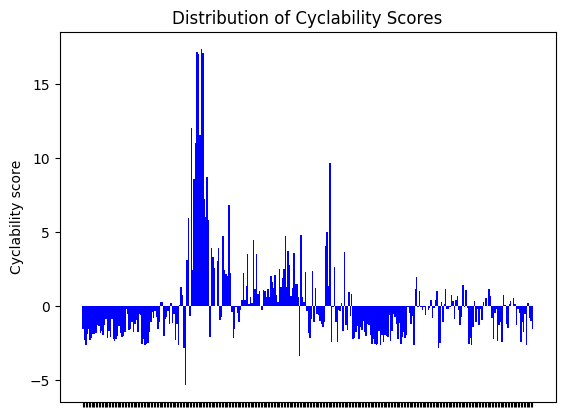

In [114]:
import matplotlib.pyplot as plt
x=range(312)
suburbs = x
labels = []
plt.xticks(suburbs, labels)
plt.ylabel('Cyclability score')
plt.title('Distribution of Cyclability Scores')
plt.bar(x, cycle_dic.values(), width=1, color='b')
plt.show()

In [68]:
# obtaining some useful statistics of the cyclability score; min, ma
mean = statistics.mean(cycle_dic.values())
print('mean: ' + str(mean))

maximum = max(cycle_dic.values())
minimum = min(cycle_dic.values())
for key in cycle_dic:
    if cycle_dic[key] == maximum:
        print('max of ' + str(maximum) + ' at ' + key)
    if cycle_dic[key] == minimum:
        print('min of ' + str(minimum) + ' at ' + key)

stdev = statistics.stdev(cycle_dic.values())
print('standard deviation: ' + str(stdev))
median = statistics.median(cycle_dic.values())
print('median: ' + str(median))

mean: 0.11425022336350052
min of -5.309911125520138 at Sydney Airport
max of 17.36326807616791 at Surry Hills
standard deviation: 3.0690067875902556
median: -0.5659017463291152


In [69]:
# Collect median household income, average monthly rent and cyclability scores for each neighbourhood
# into separate lists.

query = """SELECT median_annual_household_income, avg_monthly_rent, area_name
           FROM CensusStats C JOIN Neighbourhoods N ON C.area_id=N.area_id"""
result = pgquery(conn, query, returntype='dict')
#print(len(result))
#pprint.pprint(result)

median_incomes = []
avg_rents = []
cyc_scores = []

for i in range(len(result)):
    
    median_income = result[i]['median_annual_household_income']
    median_incomes.append(median_income)
    
    avg_rent = result[i]['avg_monthly_rent']
    avg_rents.append(avg_rent)

for key in cycle_dic.keys():
    score = cycle_dic[key]
    cyc_scores.append(score)

#print(median_incomes)
#print(avg_rents)
#print(cyc_scores)

In [70]:
# Clean lists, replacing null values with median value for each list.

incomes_zeros = []
for value in median_incomes:
    if value == None:
        value = 0
    incomes_zeros.append(value)
#print(incomes_zeros)

clean_incomes = []
for value in median_incomes:
    if value == None:
        value = statistics.median(incomes_zeros)
    clean_incomes.append(value)

rents_zeros = []
for value in avg_rents:
    if value == None:
        value = 0
    rents_zeros.append(value)
#print(rents_zeros)

clean_rents = []
for value in avg_rents:
    if value == None:
        value = statistics.median(rents_zeros)
    clean_rents.append(value)

#print(clean_incomes)
#print(clean_rents)

In [71]:
# Calculate correlation coefficients

import numpy as np

cyc_inccome_corr = np.corrcoef(cyc_scores, clean_incomes)
cyc_rent_corr = np.corrcoef(cyc_scores, clean_rents)

print(cyc_inccome_corr)
print(cyc_rent_corr)

[[ 1.         0.2045895]
 [ 0.2045895  1.       ]]
[[ 1.          0.35696472]
 [ 0.35696472  1.        ]]
